#```Yulu```

[Yulu](https://www.yulu.bike/)  is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

#```Business Casestudy```

Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

1. Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
2. How well those variables describe the electric cycle demands.

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-dark')
# plt.xkcd()

In [ ]:
# loading data
yulu = pd.read_csv('data.csv')

In [ ]:
yulu.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [ ]:
yulu.shape

(10886, 12)

In [ ]:
yulu.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

##<font color="red" face='georgia'>Features Description</font>

Dataset consists of 10886 data points with 12 features.

Following are the description of features:

1. datetime: datetime
2. season: season (1: spring, 2: summer, 3: fall, 4: winter)
3. holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
4. workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
5. weather:
  * Clear, Few clouds, partly cloudy, partly cloudy
  * Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  * Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
6. temp: temperature in Celsius
7. atemp: feeling temperature in Celsius
8. humidity: humidity
9. windspeed: wind speed
10. casual: count of casual users
11. registered: count of registered users
12. count: count of total rental bikes including both casual and registered

In [ ]:
# data type of features
yulu.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
# converting datetime from object to datetime
yulu['datetime'] = pd.to_datetime(yulu['datetime'])

In [ ]:
# Checking missing values
yulu.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are missing values in the dataset.

In [ ]:
yulu.duplicated().sum()

0

There are no duplicates as well.

In [ ]:
# Number of unique values in each column
for i in yulu.columns:
  print(i, ':', yulu[i].nunique())

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822


##<font color="red" face="georgia">Observations</font>

Season, holiday, working day, and weather are categorical/discrete variables, while the others are continuous variables.

In [ ]:
# Descriptive Statistics
yulu.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count          year         month           day          hour  
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000  
mean     191.574132   2011.501929      6.521495      9.992559     11.541613  
std      181.144454      0.500019      3.444373      5.476608      6.915838  
min        1.000000   2011.000000      1.000000      1.000000      0.000000  
25%       42.000000   2011.000000      4.000000      5.000000      6.000000  
50%      145.000000   2012.000000      7.000000     10.000000     12.000000  
75%      284.000000   2012.000000     10.000000     15.000000     18.000000  
max      977.000000   2012.000000     12.000000     19.000000     23.000000

##<font color="red" face='georgia'>Observations</font>

1. 50% of the data has been recorded in the fall season, while 75% of the data has been recorded in the winter. Very few data points are recorded in the summer.
2. For the holiday feature, very few data points are collected for the holiday.
3. 50% of the data for the working day has been recorded, otherwise
4. 75% of the data has been recorded during the cloudy season, while 50% is collected for a few clouds/clear.
5. The median temperature is noted at 20.5 degrees Celsius, while 75% of the data has been recorded at 26.24 degrees Celsius. The average temperature is noted as 20.36 degrees Celsius.
6. The median feeling temperature is 24.24 degrees Celsius, while 75% of the data has been recorded at 31.06 degrees Celsius. The average body temperature is noted as 23.65 degrees Celsius.
7. The median humidity is noted as 62, while 75% of the data has been recorded at 77. The average humidity is recorded at 61.86.
8. The median wind speed is noted as 12.998, while 75% of the wind speed is noted as 16.997. The average wind speed is noted as 12.79. The maximum humidity is 100.
9. The median causal users of the Yulu is 17, while 75% of the users are 49. The average #casual user is 36.02. The maximum number of causal users is 367.
10. The median number of registered users for the Yulu is 118, while 75% of the users are 222. The average number of registered users is 155.552. The maximum number of registered users is 886.
11. The median number of counted (casual + registered) users for the Yulu is 145, while 75% of the users are 284. The average number of counted users is 191.574. The maximum number of counted users is 977.



In [ ]:
yulu['season'].value_counts(normalize=True)

4    0.251148
2    0.251056
3    0.251056
1    0.246739
Name: season, dtype: float64

##<font color="red" face='georgia'>Observations</font>

The # datapoints collected for all the seasons are roughly equal in proportion.

In [ ]:
yulu['holiday'].value_counts(normalize=True)

0    0.971431
1    0.028569
Name: holiday, dtype: float64

##<font color="red" face='georgia'>Observations</font>

The majority of the data is collected for non-holidays, which makes sense as a lot of people on holiday might be using the service.

In [ ]:
yulu['workingday'].value_counts(normalize=True)

1    0.680875
0    0.319125
Name: workingday, dtype: float64

##<font color="red" face='georgia'>Observations</font>

68% of the data points are collected for the working day, which makes sense as a lot of people use public transportation on working days.

In [ ]:
yulu['weather'].value_counts(normalize=True)

1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: weather, dtype: float64

##<font color="red" face='georgia'>Observations</font>

1. clear skies,Partly cloudy collects 66% of the data points, while mist or cloudy collects 26% of the data points.
2. Very few data points are collected during light snow or light rain conditions; probably a lot of people don't use the service during heavy rain or thunder storms, which makes absolute sense.

In [ ]:
yulu['temp'].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

##<font color="red" face='georgia'>Observations</font>

1. The average temperature was 20.23 degrees Celsius, with 20.5 happening 50% of the time.
2. The maximum temperature is recorded at 41, and the minimum temperature is recorded at 0.82 degrees Celsius.


In [ ]:
yulu['atemp'].describe()

count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64

##<font color="red" face='georgia'>Observations</font>

1. The average feeling temperature was 23.65 degrees Celsius, with 24.24 happening 50% of the time.
2. The maximum felt temperature is recorded at 45.45, and the minimum temperature is recorded at 0.76 degrees Celsius.


In [ ]:
yulu['windspeed'].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

##<font color="red" face='georgia'>Observations</font>

1. The average wind speed was 12.8, with 12.998 happening 50% of the time.
2. The maximum wind speed was 56.996, and the minimum wind speed was recorded at 0.



In [ ]:
yulu['humidity'].describe()

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64

##<font color="red" face='georgia'>Observations</font>

1. The average humidity was 61.886%, with 62.8% of humidity happening 50% of the time.
2. The maximum humidity was 100%, while the minimum humidity was 0%.



In [ ]:
yulu['casual'].describe()

count    10886.000000
mean        36.021955
std         49.960477
min          0.000000
25%          4.000000
50%         17.000000
75%         49.000000
max        367.000000
Name: casual, dtype: float64

##<font color="red" face='georgia'>Observations</font>
1. The average number of casual users is 36.02, with 17 causal users being 50%.
2. The maximum number of casual users is 367, and the minimum number of users is zero.

In [ ]:
yulu['registered'].describe()

count    10886.000000
mean       155.552177
std        151.039033
min          0.000000
25%         36.000000
50%        118.000000
75%        222.000000
max        886.000000
Name: registered, dtype: float64

##<font color="red" face='georgia'>Observations</font>

1. The average number of registered users is 155.52, with 118 users 50% of the time.
2. The maximum and minimum number of registered users are 886 and 0, respectively.

In [ ]:
yulu['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

##<font color="red" face='georgia'>Observations</font>

1. The average number of counted users (causal + registered) is 191.57, with 145 customers 50% of the time.
2. The maximum and minimum number of total users are 977 and 1, respectively.

In [ ]:
yulu.groupby(by='season')['holiday'].sum().sort_values(ascending=False)

season
3    96
4    96
1    71
2    48
Name: holiday, dtype: int64

##<font color="red" face='georgia'>Observations</font>

1. The maximum number of holidays can be seen during the fall and winter season.

2. While spring has moderate number of holidays, the least number of holidays are in the summer season.

In [ ]:
yulu.groupby(by='season')['workingday'].sum().sort_values(ascending=False)

season
2    1893
4    1846
3    1845
1    1828
Name: workingday, dtype: int64

##<font color="red" face='georgia'>Observations</font>

1. The maximum number of working days happens in the summer, followed by the winter.

2. The least number of working days happens in the fall.

In [ ]:
yulu.groupby(by='season')['temp'].describe()

count       mean       std    min    25%    50%    75%    max
season                                                                
1       2686.0  12.530491  5.186492   0.82   9.02  12.30  16.40  29.52
2       2733.0  22.823483  5.159616   9.84  18.86  22.96  26.24  38.54
3       2733.0  28.789111  3.898157  15.58  26.24  28.70  31.16  41.00
4       2734.0  16.649239  4.742176   5.74  13.12  16.40  20.50  30.34

##<font color="red" face="georgia"> Observations </font>

1. During spring, the average temperature is recorded as 12.53 degrees Celsius, the median temperature is 12.30, and the maximum and minimum temperatures are 29.52 and 0.82, respectively.

2. In the summer season, the average temperature is recorded at 22.82 degrees Celsius, the median temperature is 22.96, and the maximum and minimum temperatures are 38.54 and 9.82, respectively.

3. In the fall season, the average temperature is recorded at 15.58 degrees Celsius, the median temperature is 28.70, and the maximum and minimum temperatures are 41 and 15.58, respectively.

4. In the winter season, the average temperature is recorded at 28.79 degrees Celsius, the median temperature is 28.70, and the maximum and minimum temperatures are 41 and 28.79, respectively.

In [ ]:
yulu.groupby(by='season')['atemp'].describe()

count       mean       std     min     25%     50%     75%     max
season                                                                     
1       2686.0  15.228956  6.092218   0.760  10.605  14.395  20.455  32.575
2       2733.0  26.647098  5.491321  11.365  22.725  26.515  31.060  43.940
3       2733.0  32.540783  4.594888  12.120  30.305  33.335  35.605  45.455
4       2734.0  20.059909  5.264197   7.575  15.910  20.455  24.240  34.090

##<font color="red" face="georgia"> Observations </font>


1. During spring, the average body temperature is recorded as 15.22 degrees Celsius, the median body temperature is 14.395, and the maximum and minimum temperatures are 32.575 and 0.76, respectively.

2. In the summer season, the average body temperature is recorded at 26.64 degrees Celsius, the median body temperature is 26.515, and the maximum and minimum temperatures are 43.940 and 11.365, respectively.

3. In the fall season, the average body temperature is recorded at 32.54 degrees Celsius, the median body temperature is 33.335, and the maximum and minimum temperatures are 45.455 and 12.120, respectively.

4. In the winter season, the average body temperature is recorded at 20.05 degrees Celsius, the median body temperature is 20.45, and the maximum and minimum temperatures are 34.090 and 7.575, respectively.

In [ ]:
yulu.groupby(by='season')['humidity'].describe()

count       mean        std   min   25%   50%   75%    max
season                                                             
1       2686.0  56.297841  20.158420   0.0  41.0  53.0  70.0  100.0
2       2733.0  60.852909  20.179655  16.0  45.0  61.0  78.0  100.0
3       2733.0  64.123674  17.217859  17.0  51.0  66.0  78.0  100.0
4       2734.0  66.173738  17.813446  16.0  52.0  66.0  81.0  100.0

##<font color="red" face="georgia"> Observations </font>

1. During spring, the average humidity is recorded at 56.29, the median humidity is 53, and the maximum and minimum are 100 and 0.0, respectively.

2. In the summer season, the average humidity is recorded at 60.85, the median humidity is 61, and the maximum and minimum are 100 and 16.0, respectively.

3. In the fall season, the average humidity is recorded at 66, the median humidity is 66, and the maximum and minimum are 100 and 17, respectively.

4. In the winter season, the average humidity is recorded at 66.17, the median humidity is 66 and the maximum and minimum are 100 and 16, respectively.

In [ ]:
yulu.groupby(by='season')['windspeed'].describe()

count       mean       std  min     25%      50%      75%      max
season                                                                     
1       2686.0  14.636978  9.150257  0.0  7.0015  12.9980  19.9995  51.9987
2       2733.0  13.405607  7.992956  0.0  7.0015  12.9980  19.0012  47.9988
3       2733.0  11.508862  7.160605  0.0  7.0015  11.0014  15.0013  56.9969
4       2734.0  11.678147  7.842632  0.0  7.0015  11.0014  16.9979  43.0006

##<font color="red" face="georgia"> Observations </font>

1. During spring, the average windspeed is recorded at 14.63, the median windspeed is 13, and the maximum and minimum are 52 and 0.0, respectively.

2. During summer, the average windspeed is recorded at 13.40, the median windspeed is 13, and the maximum and minimum are 48 and 0.0, respectively.

3. During fall, the average windspeed is recorded at 11.52, the median windspeed is 11.00, and the maximum and minimum are 57 and 0.0, respectively.

4. During winter, the average windspeed is recorded at 11.67, the median windspeed is 11.00, and the maximum and minimum are 43 and 0.0, respectively.

In [ ]:
yulu.groupby(by='season')['registered'].describe()

count        mean         std  min   25%    50%     75%    max
season                                                                 
1       2686.0  100.853686  108.082025  0.0  22.0   69.0  141.00  681.0
2       2733.0  167.804610  156.156658  0.0  39.0  133.0  243.00  782.0
3       2733.0  182.196853  164.386982  0.0  53.0  151.0  252.00  886.0
4       2734.0  170.407462  154.828357  1.0  46.0  139.0  238.75  857.0

##<font color="red" face="georgia"> Observations </font>

1. During spring, the average number of registered users is recorded at 101, the median number of registered users is 69, and the maximum and minimum are 681 and 0.0, respectively.

2. During the summer season, the average number of registered users is recorded at 168, the median number of registered users is 133, and the maximum and minimum are 782 and 0.0, respectively.

3. During the fall season, the average number of registered users is recorded at 182, the median number of registered users is 151, and the maximum and minimum are 886 and 0.0, respectively.

4. During the winter season, the average number of registered users is recorded at 170, the median number of registered users is 139, and the maximum and minimum are 857 and 1, respectively.

In [ ]:
yulu.groupby(by='season')['count'].describe()

count        mean         std  min   25%    50%    75%    max
season                                                                
1       2686.0  116.343261  125.273974  1.0  24.0   78.0  164.0  801.0
2       2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0
3       2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0
4       2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0

##<font color="red" face="georgia"> Observations </font>

1. During spring, the average number of total users is recorded at 116, the median number of total users is 78, and the maximum and minimum are 801 and 1, respectively.

2. During summer, the average number of total users is recorded at 215, the median number of total users is 172, and the maximum and minimum are 873 and 1, respectively.

3. During fall, the average number of total users is recorded at 234, the median number of total users is 195, and the maximum and minimum are 977 and 1, respectively.

4. During winter, the average number of total users is recorded at 198, the median number of total users is 161, and the maximum and minimum are 948 and 1, respectively.


In [ ]:
yulu.groupby(by='weather')['registered'].describe()

count        mean         std    min    25%    50%    75%    max
weather                                                                   
1        7192.0  164.928115  155.294051    0.0   41.0  130.0  236.0  886.0
2        2834.0  148.170078  144.765721    0.0   35.0  112.0  211.0  788.0
3         859.0  101.403958  119.344152    0.0   21.5   64.0  134.0  791.0
4           1.0  158.000000         NaN  158.0  158.0  158.0  158.0  158.0

##<font color="red" face="georgia">Observations</font>

1. During clear weather, the average number of registered users is recorded at 165, the median number of registered users is 130, and the maximum and minimum are 886 and 0, respectively.

2. During misty and cloudy conditions, the average number of registered users is recorded at 148, the median number of registered users is 112, and the maximum and minimum are 788 and 0, respectively.

3. During light snow or light rain, the average number of registered users is recorded at 101, the median number of registered users is 64, and the maximum and minimum are 791 and 0, respectively.

4. During heavy rain and thunderstorms, only one data point is recorded as having an average, median, minimum, and maximum of 158.


In [ ]:
yulu.groupby(by='weather')['count'].describe()

count        mean         std    min    25%    50%    75%    max
weather                                                                   
1        7192.0  205.236791  187.959566    1.0   48.0  161.0  305.0  977.0
2        2834.0  178.955540  168.366413    1.0   41.0  134.0  264.0  890.0
3         859.0  118.846333  138.581297    1.0   23.0   71.0  161.0  891.0
4           1.0  164.000000         NaN  164.0  164.0  164.0  164.0  164.0

##<font color="red" face="georgia">Observations</font>

1. During clear weather, the average number of total users is recorded at 205.23, the median number of total users is 161, and the maximum and minimum are 977 and 1, respectively.

2. During misty and cloudy conditions, the average number of total users is recorded at 178.95, the median number of total users is 134, and the maximum and minimum are 890 and 1, respectively.

3. During light snow or light rain, the average number of total users is recorded at 859, the median number of total users is 71, and the maximum and minimum are 897 and 1, respectively.

4. During heavy rain and thunderstorms, only one data point is recorded as having an average, median, minimum, and maximum of 164.



##```Date/Time Analysis```

In [ ]:
yulu_copy = yulu.copy()
# extracting year from datetime
yulu_copy['year'] = yulu['datetime'].dt.year
# extracting month from datetime
yulu_copy['month'] = yulu['datetime'].dt.month
# extracting day from datetime
yulu_copy['day'] = yulu['datetime'].dt.day
# extracting day from datetime
yulu_copy['hour'] = yulu['datetime'].dt.hour

In [ ]:
yulu_copy.groupby(by='year')['count'].describe()

count        mean         std  min   25%    50%    75%    max
year                                                                
2011  5422.0  144.223349  133.312123  1.0  32.0  111.0  210.0  638.0
2012  5464.0  238.560944  208.114003  1.0  59.0  199.0  354.0  977.0

##<font color="red" face="georgia">Observations</font>

1. In the year 2011, the average number of total users was 144, with a huge standard deviation of 133, a median of 111, and a maximum and minimum count of 638 and 1, respectively.
2. In the year 2012, the average number of total users was 238.56, with a huge standard deviation of 208, a median of 199, and a maximum and minimum count of 977 and 1, respectively.

In [ ]:
yulu_copy.groupby(by='month')['count'].describe()

count        mean         std  min    25%    50%     75%    max
month                                                                 
1      884.0   90.366516   95.302518  1.0  20.00   65.0  123.00  512.0
2      901.0  110.003330  109.802322  1.0  26.00   78.0  157.00  539.0
3      901.0  148.169811  155.352814  1.0  26.00  100.0  219.00  801.0
4      909.0  184.160616  182.417619  1.0  35.00  133.0  277.00  822.0
5      912.0  219.459430  189.320173  1.0  56.00  182.0  323.50  873.0
6      912.0  242.031798  199.628690  1.0  73.75  206.0  363.00  869.0
7      912.0  235.325658  184.857337  1.0  77.25  209.5  358.50  872.0
8      912.0  234.118421  197.198461  1.0  67.75  193.0  337.25  897.0
9      909.0  233.805281  208.915910  1.0  58.00  188.0  349.00  977.0
10     911.0  227.699232  204.079411  1.0  57.00  180.0  342.00  948.0
11     911.0  193.677278  165.420965  1.0  53.50  162.0  284.00  724.0
12     912.0  175.614035  155.926050  1.0  45.00  138.0  257.00  759.0

##<font color="red" face="georgia">Observations</font>

1. In January, the average number of total users was 90.36, with a standard deviation of 95, a median of 65, and a maximum and minimum count of 512 and 1, respectively.
2. In February, the average number of total users was 110, with a standard deviation of 109, a median of 78, and a maximum and minimum count of 539 and 1, respectively.
3. In March, the average number of total users was 148, with a standard deviation of 155.35, a median of 100, and a maximum and minimum count of 801 and 1, respectively.
4. In April, the average number of total users was 184, with a standard deviation of 182.41, a median of 133, and a maximum and minimum count of 822 and 1, respectively.
5. In May, the average number of total users was 219, with a standard deviation of 189, a median of 182, and a maximum and minimum count of 873 and 1, respectively.
6. In June, the average number of total users was 242, with a standard deviation of 199, a median of 206, and a maximum and minimum count of 869 and 1, respectively.
7. In July, the average number of total users was 235, with a standard deviation of 184, a median of 209, and a maximum and minimum count of 872 and 1, respectively.
8. In August, the average number of total users was 234, with a standard deviation of 197, a median of 193, and a maximum and minimum count of 897 and 1, respectively.
9. In September, the average number of total users was 233, with a standard deviation of 208, a median of 188, and a maximum and minimum count of 977 and 1, respectively.
10. In October, the average number of total users was 228, with a standard deviation of 204, a median of 180, and a maximum and minimum count of 948 and 1, respectively.
11. In November, the average number of total users was 193, with a standard deviation of 165, a median of 65, and a maximum and minimum count of 724 and 1, respectively.
12. In December, the average number of total users was 175.61, with a standard deviation of 156, a median of 138, and a maximum and minimum count of 759 and 1, respectively.

In [ ]:
yulu_copy.groupby(by='year')['registered'].describe()

count        mean         std  min   25%    50%    75%    max
year                                                                
2011  5422.0  115.485430  108.847868  0.0  27.0   91.0  168.0  567.0
2012  5464.0  195.310944  174.709050  1.0  51.0  161.0  281.0  886.0

##<font color="red" face="georgia">Observations</font>

1. In the year 2011, the average number of registered users was 115.45, with a huge standard deviation of 108, a median of 91, and a maximum and minimum registered count of 567 and 0, respectively.
2. In the year 2012, the average number of total users was 195.31, with a huge standard deviation of 174.74, a median of 161, and a maximum and minimum registered count of 886 and 1, respectively.

In [ ]:
yulu_copy.groupby(by='month')['registered'].describe()

count        mean         std  min    25%    50%     75%    max
month                                                                 
1      884.0   82.162896   87.279160  0.0  19.00   57.5  113.25  497.0
2      901.0   99.684795  102.154526  0.0  23.00   72.0  140.00  522.0
3      901.0  120.360710  127.340950  0.0  24.00   83.0  175.00  681.0
4      909.0  140.361936  144.634203  0.0  28.00   97.0  198.00  677.0
5      912.0  174.190789  156.240227  1.0  45.75  142.0  248.75  770.0
6      912.0  188.770833  163.200567  1.0  59.00  160.5  265.00  782.0
7      912.0  179.462719  154.756169  1.0  57.75  154.0  244.00  790.0
8      912.0  183.822368  165.753614  0.0  53.75  151.0  254.00  786.0
9      909.0  183.309131  172.343532  0.0  46.00  145.0  256.00  886.0
10     911.0  185.891328  173.823639  1.0  49.00  150.0  256.50  857.0
11     911.0  165.847420  143.563616  1.0  48.00  139.0  235.00  694.0
12     912.0  159.495614  144.105302  1.0  41.75  127.0  230.00  737.0

##<font color="red" face="georgia">Observations</font>

1. In January, the average number of registered users was 82, with a standard deviation of 87.27, a median of 57.5, and a maximum and minimum registered count of 497 and 0, respectively.
2. In February, the average number of registered users was 100, with a standard deviation of 102, a median of 72, and a maximum and minimum registered count of 522 and 0, respectively.
3. In March, the average number of registered users was 120, with a standard deviation of 127, a median of 83, and a maximum and minimum registered count of 681 and 0, respectively.
4. In April, the average number of registered users was 140.36, with a standard deviation of 144, a median of 97, and a maximum and minimum registered count of 677 and 0, respectively.
5. In May, the average number of registered users was 174, with a standard deviation of 156, a median of 142, and a maximum and minimum registered count of 770 and 1, respectively.
6. In June, the average number of total registered was 189, with a standard deviation of 163, a median of 160.5, and a maximum and minimum registered count of 782 and 1, respectively.
7. In July, the average number of total registered users was 179, with a standard deviation of 155, a median of 154, and a maximum and minimum count of 790 and 1, respectively.
8. In August, the average number of registered users was 151, with a standard deviation of 166, a median of 151, and a maximum and minimum registered count of 786 and 1, respectively.
9. In September, the average number of registered users was 183, with a standard deviation of 166, a median of 145, and a maximum and minimum registered count of 886 and 1, respectively.
10. In October, the average number of registered users was 186, with a standard deviation of 172, a median of 150, and a maximum and minimum registered count of 857 and 1, respectively.
11. In November, the average number of registered users was 166, with a standard deviation of 144, a median of 139, and a maximum and minimum registered count of 694 and 1, respectively.
12. In December, the average number of registered users was 159, with a standard deviation of 144, a median of 127, and a maximum and minimum registered count of 737 and 1, respectively.

In [ ]:
yulu_copy.groupby(by=['month', 'hour'])['registered'].sum().sort_values(ascending=False)

month  hour
10     17      18838
8      17      18633
6      17      17985
8      18      17815
5      17      17585
               ...  
2      3         169
4      4         132
3      4         102
1      4          98
2      4          79
Name: registered, Length: 288, dtype: int64

##<font color="red" face="georgia">Observations</font>

1. In October, August, and July, the majority of registered customers book at 17 hours.

2. The month of February, January, has the fewest Yulu vehicle registrations.

In [ ]:
yulu_copy.groupby(by=['month', 'hour'])['count'].sum().sort_values(ascending=False)

month  hour
10     17      22524
8      17      22505
6      17      22192
8      18      21431
9      17      21339
               ...  
2      3         198
4      4         174
3      4         140
1      4         110
2      4          87
Name: count, Length: 288, dtype: int64

##<font color="red" face="georgia">Observations</font>

Same observations as above.

In [ ]:
yulu_copy.groupby(by=['month', 'hour'])['casual'].sum().sort_values(ascending=False)

month  hour
6      17      4207
9      17      4205
7      17      4085
9      13      4080
       14      4041
               ... 
12     5         19
1      4         12
2      4          8
       5          7
1      5          5
Name: casual, Length: 288, dtype: int64

##<font color="red" face="georgia">Observations</font>

1. In June, September, and July, the majority of casual customers book at 17 hours.

2. Yulu vehicles' casual users are lowest in January and February.

In [ ]:
bins = [0, 10, 20, 30, 40, 50]
labels = ['extreme_cold', 'cold', 'moderate', 'hot', 'extreme_hot']
yulu_copy['temp_bin'] = pd.cut(yulu_copy['temp'], bins=bins, labels=labels)

In [ ]:
yulu_copy.groupby(by='temp_bin')['count'].sum().sort_values(ascending=False)

temp_bin
moderate        968265
cold            609233
hot             415543
extreme_cold     92141
extreme_hot        294
Name: count, dtype: int64

##<font color="red" face="georgia">Observations</font>

1. The maximum number of vehicles is demanded during the temperature range of 20-to-30 degrees Celsius.

2. The lowest number of vehicles is demanded during the temperature range of 40-to-50 degrees Celsius.

3. A moderate number of vehicles is demanded during cold and hot temperatures.

In [ ]:
yulu_copy.groupby(by='temp_bin')['registered'].sum().sort_values(ascending=False)

temp_bin
moderate        766069
cold            528555
hot             311357
extreme_cold     87168
extreme_hot        192
Name: registered, dtype: int64

##<font color="red" face="georgia">Observations</font>

Same observations as above.

In [ ]:
yulu_copy.groupby(by='temp_bin')['casual'].sum().sort_values(ascending=False)

temp_bin
moderate        202196
hot             104186
cold             80678
extreme_cold      4973
extreme_hot        102
Name: casual, dtype: int64

##<font color="red" face="georgia">Observations</font>

Same observations as above.

##```Correlations```

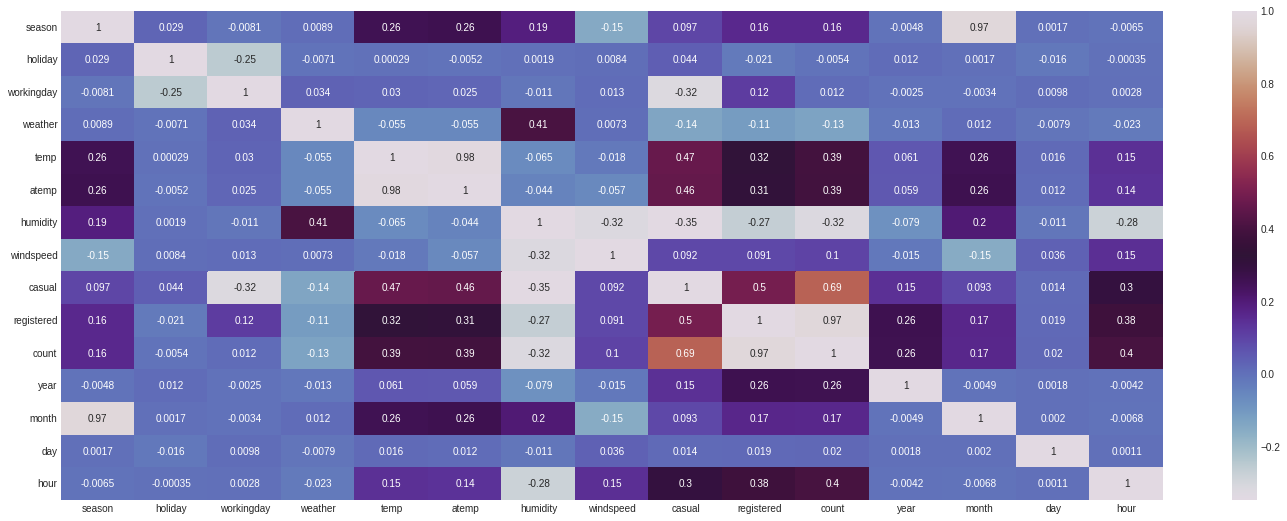

In [ ]:
plt.figure(figsize=(22,9))
sns.heatmap(yulu_copy.corr(), annot=True, cmap="twilight", xticklabels=1, yticklabels=1)
plt.show()

##<font color="red" face="georgia">Observations</font>

1. Season and temperature, as well as season and body temperature, have a moderately positive correlation.
2. There is also a moderately positive relationship between weather and humidity.
3. There is a moderately positive relationship between temporary workers and casual demand, pre-booked vehicles, and temporary workers and count.
4. The correlation between body temp and casual demand, temp and pre-booked vechiles, and temp and count is moderate.
5. Holidays and working days have a moderately negative correlation.
6. There is a 50% correlation between pre-booked and casual users.
7. There is a strong positive correlation between casual and count, and a very high correlation between registered and counted users.
8. There is a positive, strong correlation between the month and the season.
9. There is a moderately positive correlation between registered hours and counted hours.
10. There is a moderately positive correlation between registered years and counted years.
11. There is a moderately negative correlation between humidity and hours.


##```Univariate Analysis```

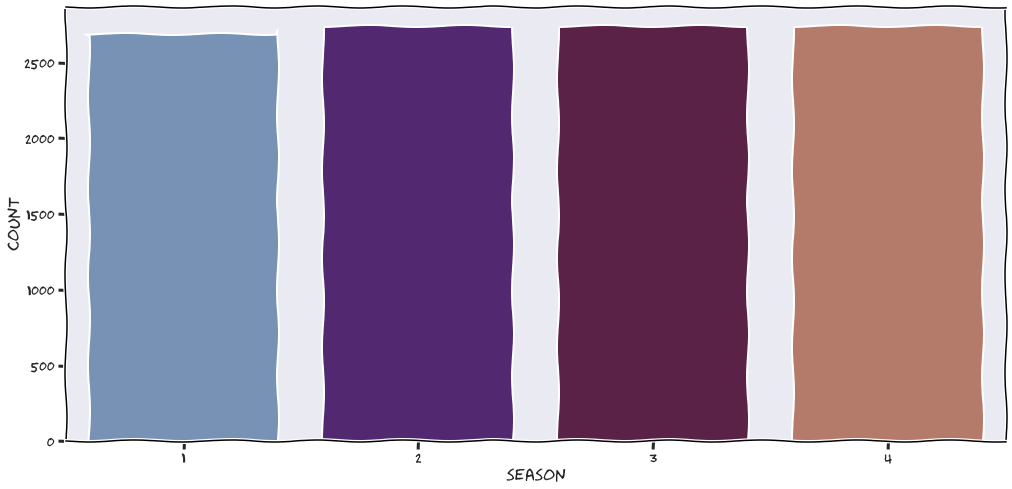

In [ ]:
plt.figure(figsize=(15,8))
with plt.xkcd():
  sns.countplot(data=yulu, x='season', palette="twilight")
  plt.show()

##<font color="red" face="georgia">Observations</font>

The seasons are roughly equal in proportion.

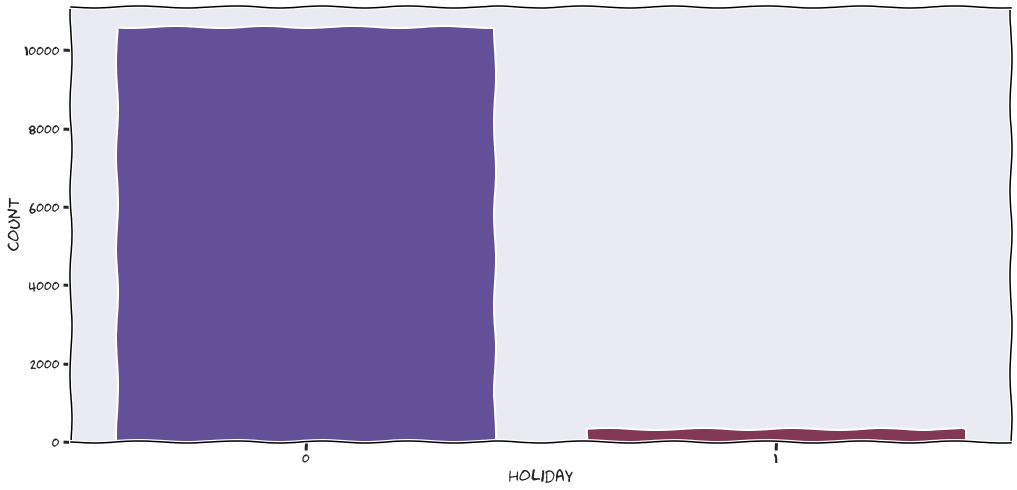

In [ ]:
plt.figure(figsize=(15,8))
with plt.xkcd():
  sns.countplot(data=yulu, x='holiday', palette="twilight")
  plt.show()

##<font color="red" face="georgia">Observations</font>

There is a high imbalance in holiday classes. Probably because a lot of people don't use vehicles on holiday.

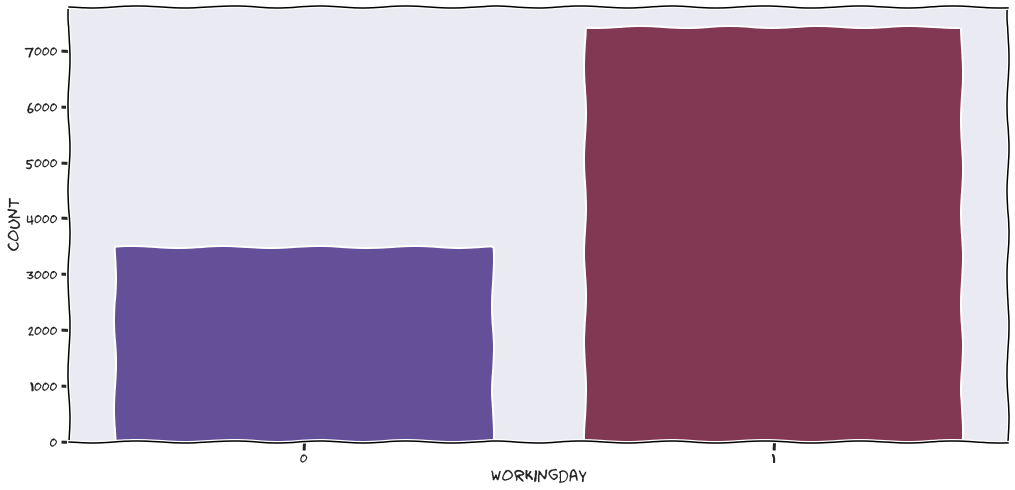

In [ ]:
plt.figure(figsize=(15,8))
with plt.xkcd():
  sns.countplot(data=yulu, x='workingday', palette="twilight")
  plt.show()

##<font color="red" face="georgia">Observations</font>

There is a high imbalance in working-day classes. Probably because a lot of people use vehicles on workdays.

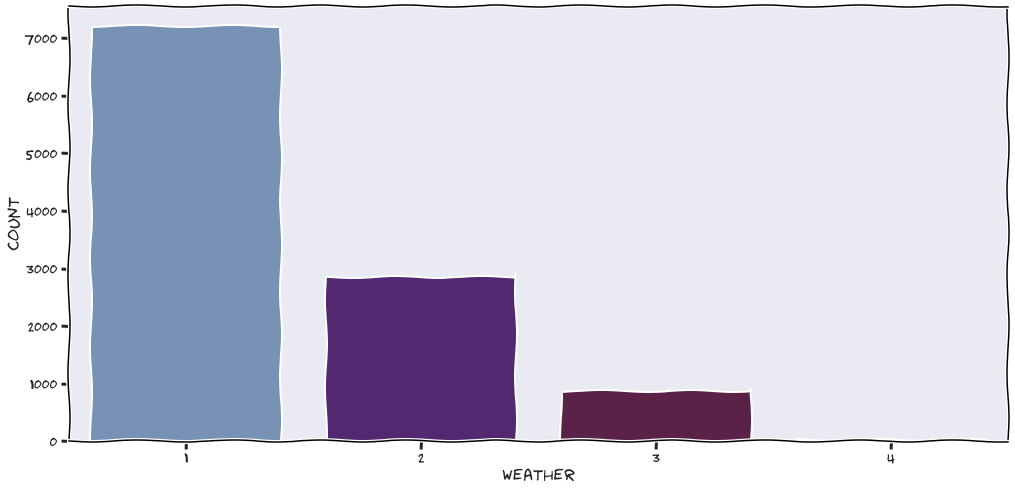

In [ ]:
plt.figure(figsize=(15,8))
with plt.xkcd():
  sns.countplot(data=yulu, x='weather', palette="twilight")
  plt.show()

##<font color="red" face="georgia">Observations</font>

1. clear skies,Partly cloudy collects 66% of the data points, while mist or cloudy collects 26% of the data points.
2. Very few data points are collected during light snow or light rain conditions; probably a lot of people don't use the service during heavy rain or thunder storms, which makes absolute sense.

<Figure size 1080x576 with 0 Axes>

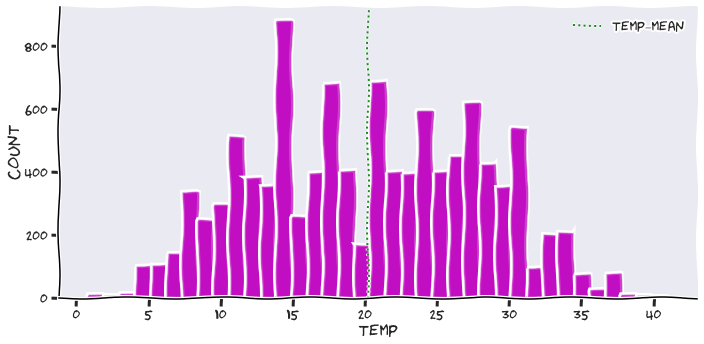

In [ ]:
plt.figure(figsize=(15,8))
with plt.xkcd():
  sns.displot(data=yulu, x='temp', palette="twilight", aspect=2, color="m")
  plt.axvline(x=yulu['temp'].mean(), linestyle=":", color='g', label="temp_mean", alpha=0.9)
  plt.legend()
  plt.show()

##<font color="red" face="georgia">Observations</font>

1. The average temperature was 20.23 degrees Celsius.
2. The maximum temperature is recorded at 41, and the minimum temperature is recorded at 0.82 degrees Celsius.

<Figure size 1080x576 with 0 Axes>

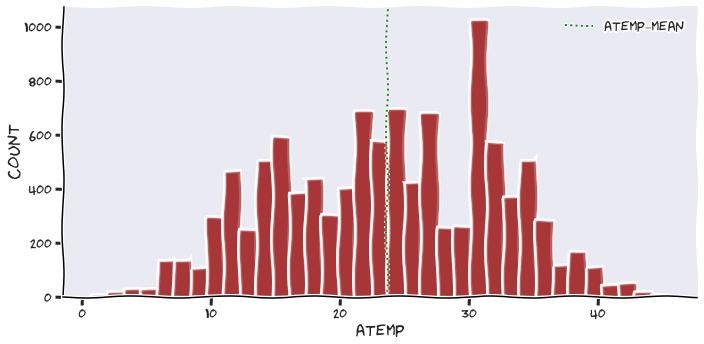

In [ ]:
plt.figure(figsize=(15,8))
with plt.xkcd():
  sns.displot(data=yulu, x='atemp', palette="twilight", aspect=2, color="brown")
  plt.axvline(x=yulu['atemp'].mean(), linestyle=":", color='g', label="atemp_mean", alpha=0.9)
  plt.legend()
  plt.show()

##<font color="red" face="georgia">Observations</font>

1. The average feeling temperature was 23.65 degrees Celsius.
2. The maximum felt temperature is recorded at 45.45, and the minimum temperature is recorded at 0.76 degrees Celsius.

<Figure size 1080x576 with 0 Axes>

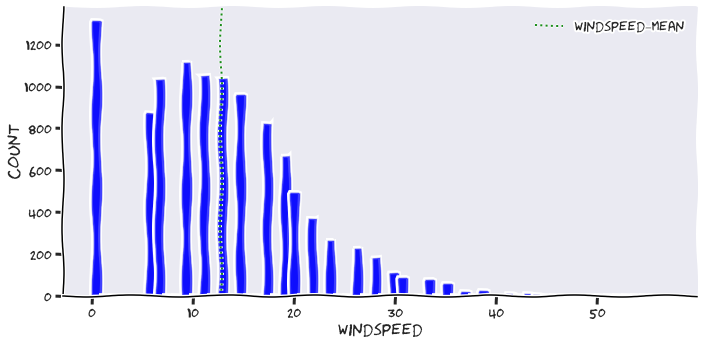

In [ ]:
plt.figure(figsize=(15,8))
with plt.xkcd():
  sns.displot(data=yulu, x='windspeed', palette="twilight", aspect=2, color="b")
  plt.axvline(x=yulu['windspeed'].mean(), linestyle=":", color='g', label="windspeed_mean", alpha=0.9)
  plt.legend()
  plt.show()

##<font color="red" face="georgia">Observations</font>

Clearly, the windspeed graph is right skewed.The average wind speed was 12.8. The maximum wind speed was 56.996, and the minimum wind speed was recorded at 0.

Windspeed of zero has the highest number of data points.

<Figure size 1080x576 with 0 Axes>

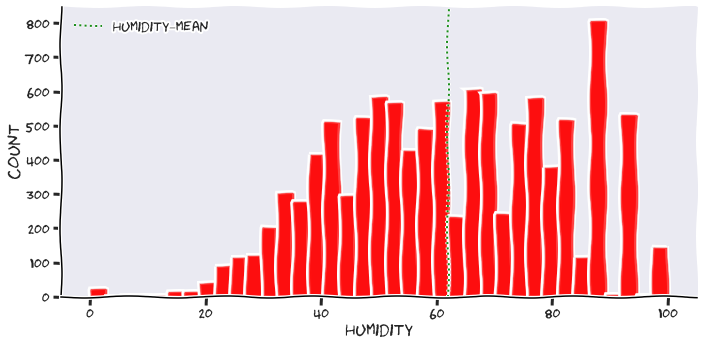

In [ ]:
plt.figure(figsize=(15,8))
with plt.xkcd():
  sns.displot(data=yulu, x='humidity', palette="twilight", aspect=2, color="r")
  plt.axvline(x=yulu['humidity'].mean(), linestyle=":", color='g', label="humidity_mean", alpha=0.9)
  plt.legend()
  plt.show()

##<font color="red" face="georgia">Observations</font>

Graph looks slightly left skewed, with maximum humidity at 100. The average humidity observed is 61.886.

<Figure size 1080x576 with 0 Axes>

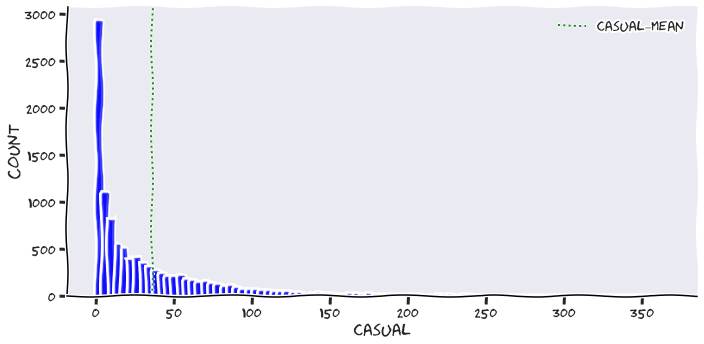

In [ ]:
plt.figure(figsize=(15,8))
with plt.xkcd():
  sns.displot(data=yulu, x='casual', palette="twilight", aspect=2, color="b")
  plt.axvline(x=yulu['casual'].mean(), linestyle=":", color='g', label="casual_mean", alpha=0.9)
  plt.legend()
  plt.show()

##<font color="red" face="georgia">Observations</font>

1. The casual users graph is strongly right skewed, with majority of the values lying at 0.
2. The average number of casual users is 36.02.
3. The maximum number of casual users is 367, and the minimum number of users is zero.

<Figure size 1080x576 with 0 Axes>

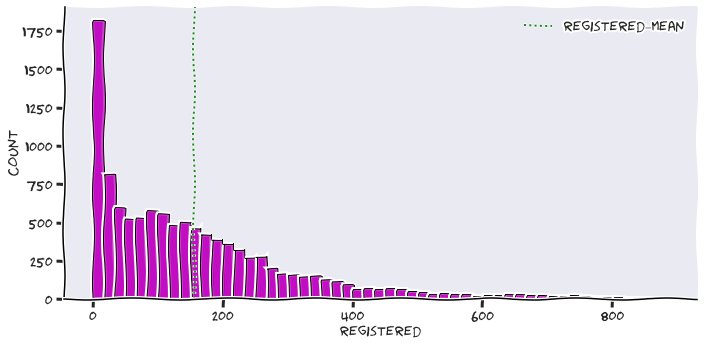

In [ ]:
plt.figure(figsize=(15,8))
with plt.xkcd():
  sns.displot(data=yulu, x='registered', palette="twilight", aspect=2, color="m")
  plt.axvline(x=yulu['registered'].mean(), linestyle=":", color='g', label="registered_mean", alpha=0.9)
  plt.legend()
  plt.show()

##<font color="red" face="georgia">Observations</font>

Registered graph is clearly right skewed, having average of 155.52 users. The maximum and minimum number of registered users are 886 and 0, respectively.

<Figure size 1080x576 with 0 Axes>

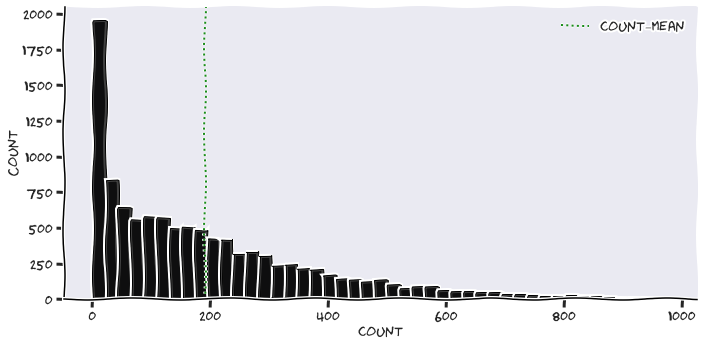

In [ ]:
plt.figure(figsize=(15,8))
with plt.xkcd():
  sns.displot(data=yulu, x='count', palette="twilight", aspect=2, color="black")
  plt.axvline(x=yulu['count'].mean(), linestyle=":", color='g', label="count_mean", alpha=0.9)
  plt.legend()
  plt.show()

##<font color="red" face="georgia">Observations</font>

As count is sum of registered and casual users, the graph will be rightly skewed. The peak of the graph is at zero, while the average is at 91.57.


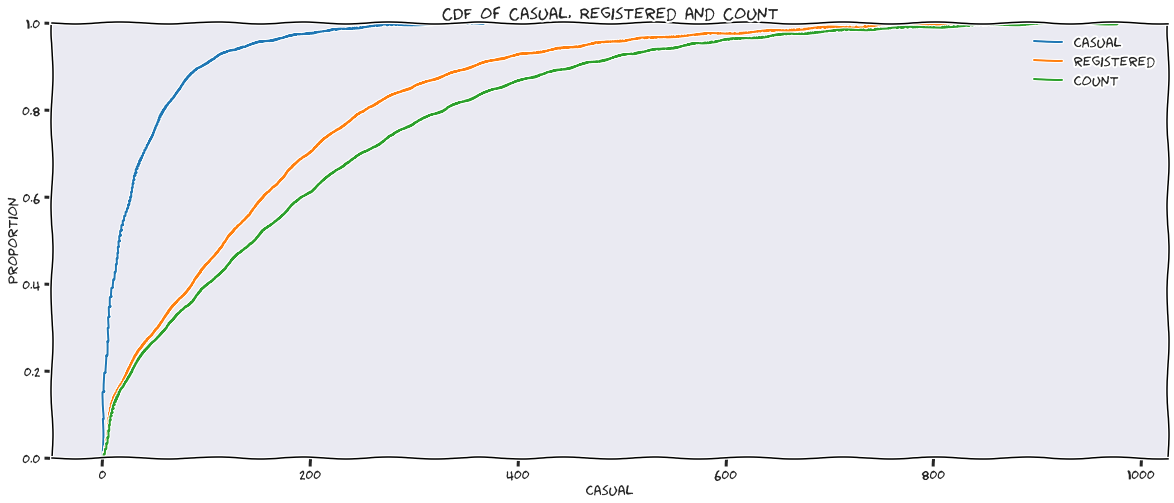

In [ ]:
plt.figure(figsize=(20,8))
with plt.xkcd():
  sns.ecdfplot(data=yulu, x="casual", palette="copper", legend=True, label="casual")
  sns.ecdfplot(data=yulu, x="registered", palette="copper", legend=True, label="registered")
  sns.ecdfplot(data=yulu, x="count", palette="copper", legend=True, label="count")
  plt.legend()
  plt.title("CDF of Casual, Registered and Count")

##```Bivariate Analysis```

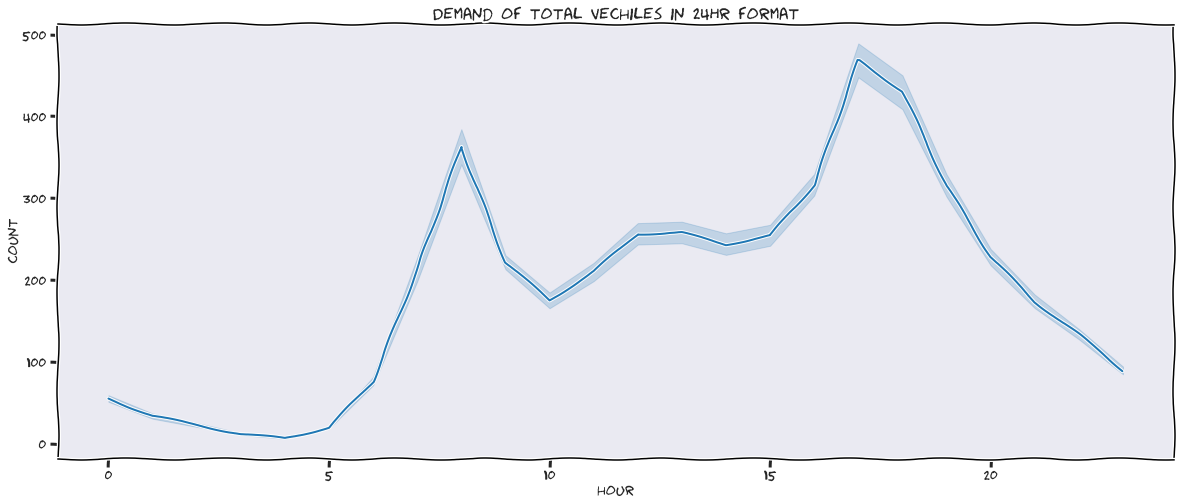

In [ ]:
plt.figure(figsize=(20,8))
with plt.xkcd():
  sns.lineplot(x="hour", y="count", data=yulu_copy, palette="terrain")
  plt.title("Demand of total vechiles in 24Hr format")
  plt.show()

##<font color="red" face="georgia">Observations</font>

The highest peak demand can be seen during the 17-19 hour period, followed by the peak from 7-9 hours.

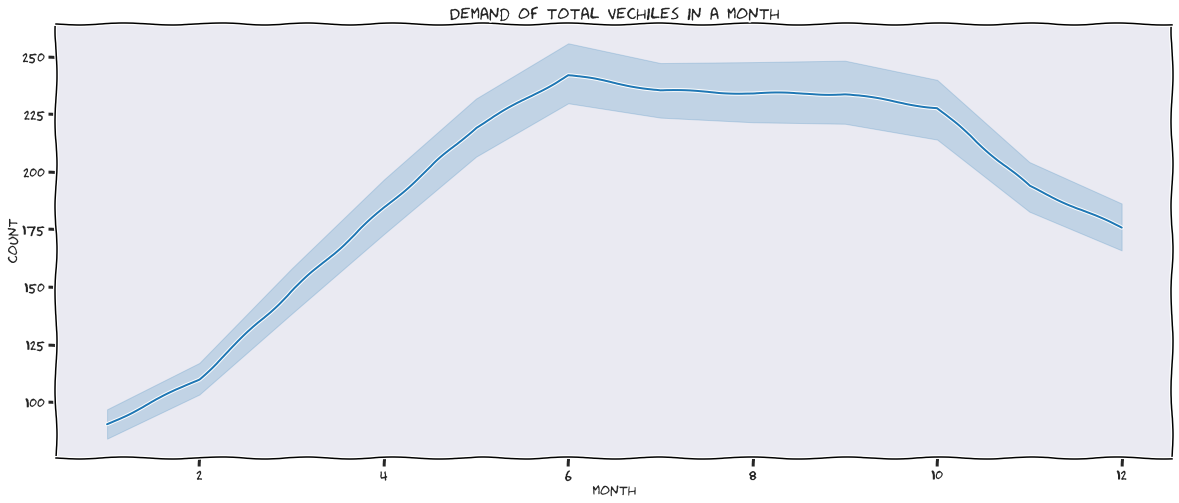

In [ ]:
plt.figure(figsize=(20,8))
with plt.xkcd():
  sns.lineplot(x="month", y="count", data=yulu_copy, palette="terrain")
  plt.title("Demand of total vechiles in a month")
  plt.show()

##<font color="red" face="georgia">Observations</font>

Steady vehicle demand is from July to October; after that, from November to February, it is downgrading. The demand curve is linear from February to July.

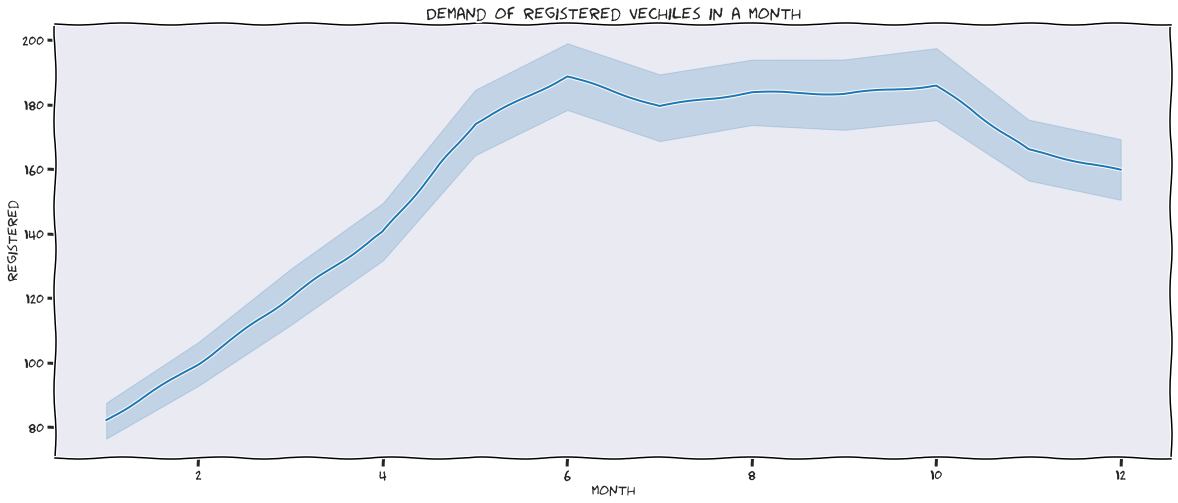

In [ ]:
plt.figure(figsize=(20,8))
with plt.xkcd():
  sns.lineplot(x="month", y="registered", data=yulu_copy, palette="terrain")
  plt.title("Demand of registered vechiles in a month")
  plt.show()

##<font color="red" face="georgia">Observations</font>

Same observations as in count demand

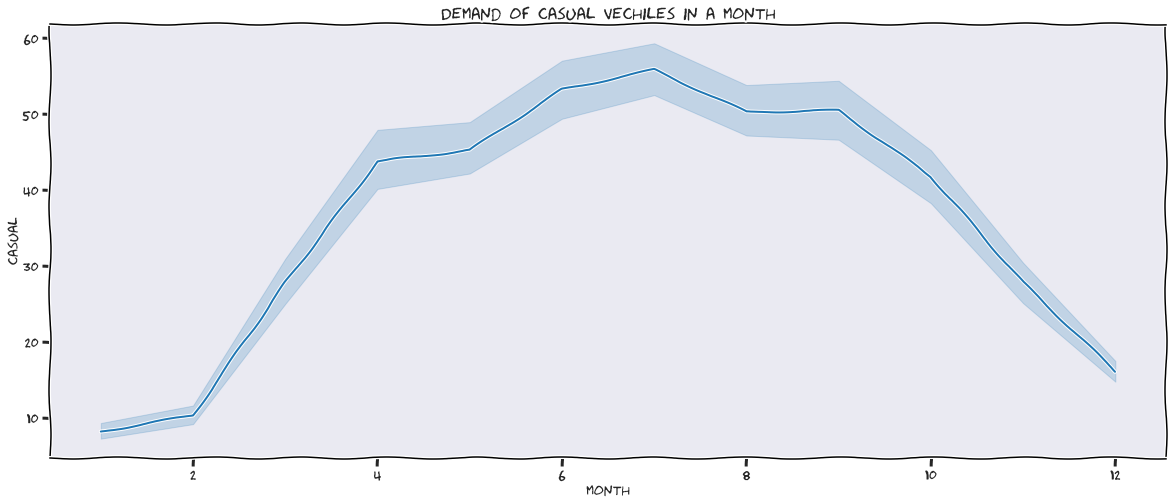

In [ ]:
plt.figure(figsize=(20,8))
with plt.xkcd():
  sns.lineplot(x="month", y="casual", data=yulu_copy, palette="terrain")
  plt.title("Demand of casual vechiles in a month")
  plt.show()

##<font color="red" face="georgia">Observations</font>

Same observations as in count demand.

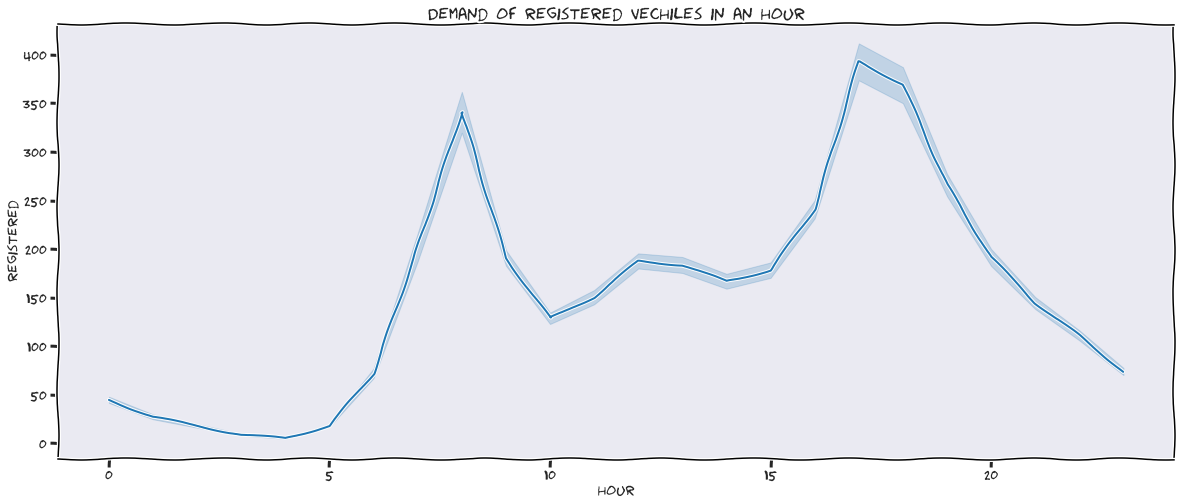

In [ ]:
plt.figure(figsize=(20,8))
with plt.xkcd():
  sns.lineplot(x="hour", y="registered", data=yulu_copy, palette="terrain")
  plt.title("Demand of registered vechiles in an hour")
  plt.show()

##<font color="red" face="georgia">Observations</font>

Same observations as in registered demand curve in 24Hr format.

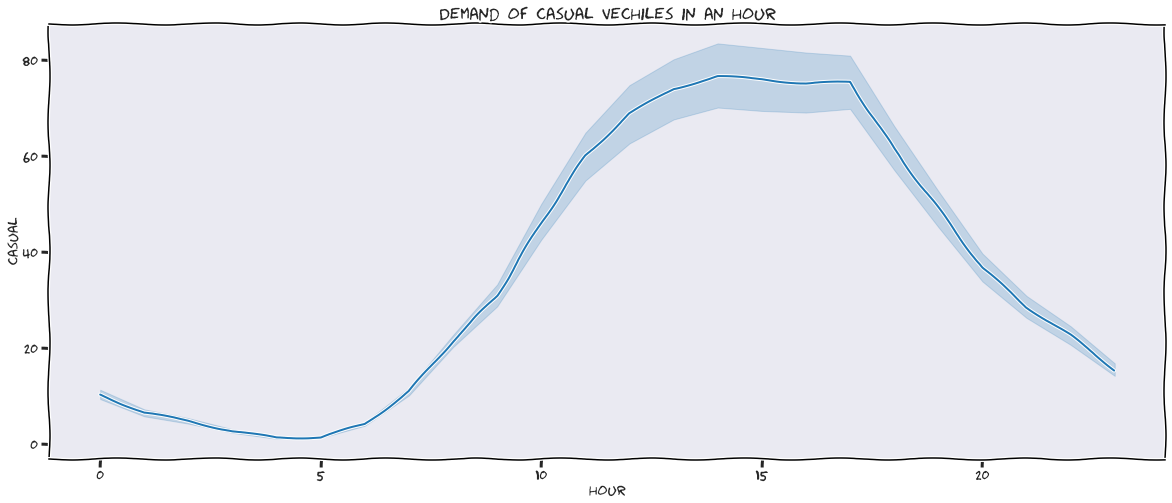

In [ ]:
plt.figure(figsize=(20,8))
with plt.xkcd():
  sns.lineplot(x="hour", y="casual", data=yulu_copy, palette="gist_earth")
  plt.title("Demand of casual vechiles in an hour")
  plt.show()

##<font color="red" face="georgia">Observations</font>

The casual demand curve in an hour is steady and peaks from 14–16 hours, while it steadily falls from 16–24 hours. There is linear demand from 5.5 to 14 hours.


<Figure size 1440x576 with 0 Axes>

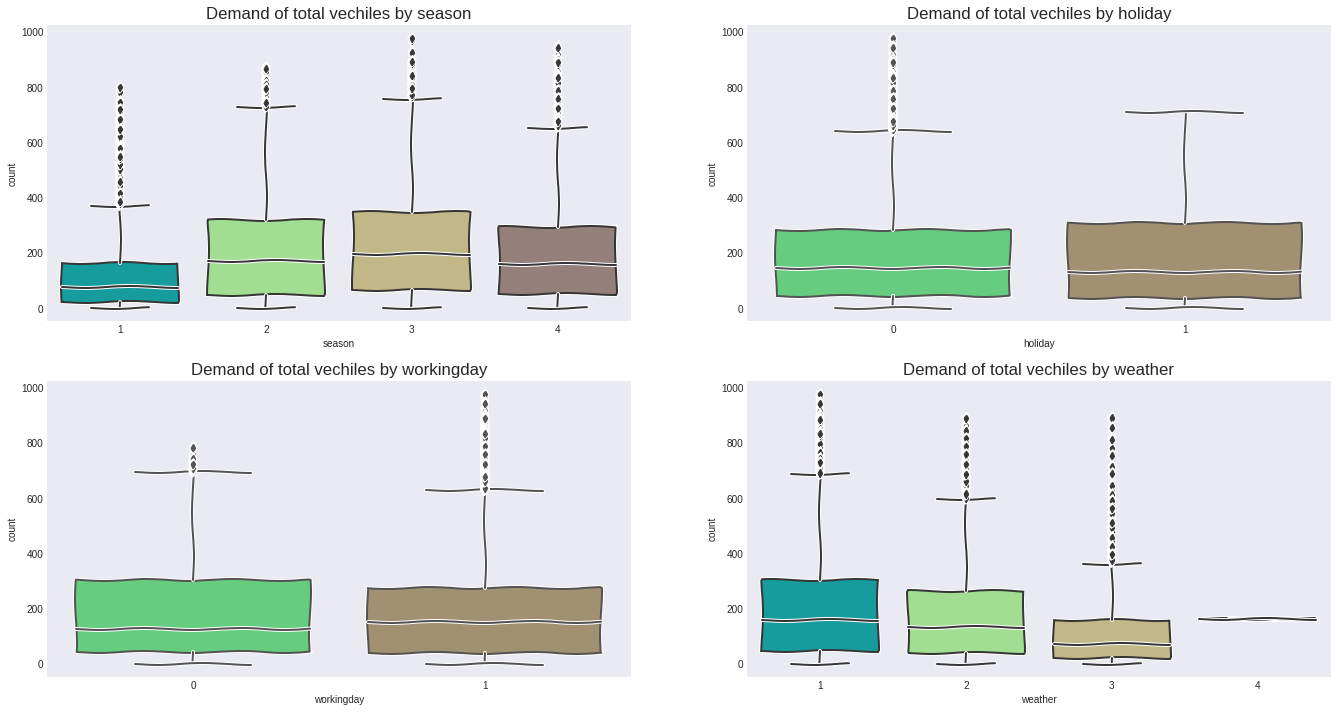

In [ ]:
plt.figure(figsize=(20,8))
categorical_columns = ['season', 'holiday', 'workingday', 'weather']

fig, ax = plt.subplots(2, 2, figsize=(23, 12))
axes = ax.ravel()

with plt.xkcd():
  for index, column in enumerate(categorical_columns):
    sns.boxplot(data=yulu, x=column, y="count", palette="terrain", ax=axes[index])
    axes[index].set_title(f"Demand of total vechiles by {column}", )

##<font color="red" face="georgia">Observations</font>

#```Season```
  1. The median demand in the summer, fall, and winter seasons is nearly identical, while the median is very low in the spring season.

  2. The outliers in countable demand can be seen for all the seasons, probably lot of outliers in spring season. All the outliers are in the upper range of Inter Quartile Range (IQR).

#```Holiday```

  1. The median counted demand is nearly identical during holidays and non-holidays.

  2. There are no outliers in the counted demand for holidays, whereas there are outliers in the non-holiday demand, and that too, in the upper Inter Quartile Range (IQR).

#```workingday```

  1. The median difference between a working day and a non-working day is only marginally significant.

  2. There are outliers in vehicle demand on working and non-working days.

#```Weather```

1. For clear/few clouds and misty/cloudy conditions, the median demand for counted vehicles is nearly identical.

2. The demand for counted vehicles during light snow/light rain is less than during clear and mist conditions.

3. There is only one data point for heavy rain and thunder storms, which makes sense as nobody would prefer to ride in these heavy conditions.

4. There are outliers in the upper IQR for all the conditions, except heavy rain.


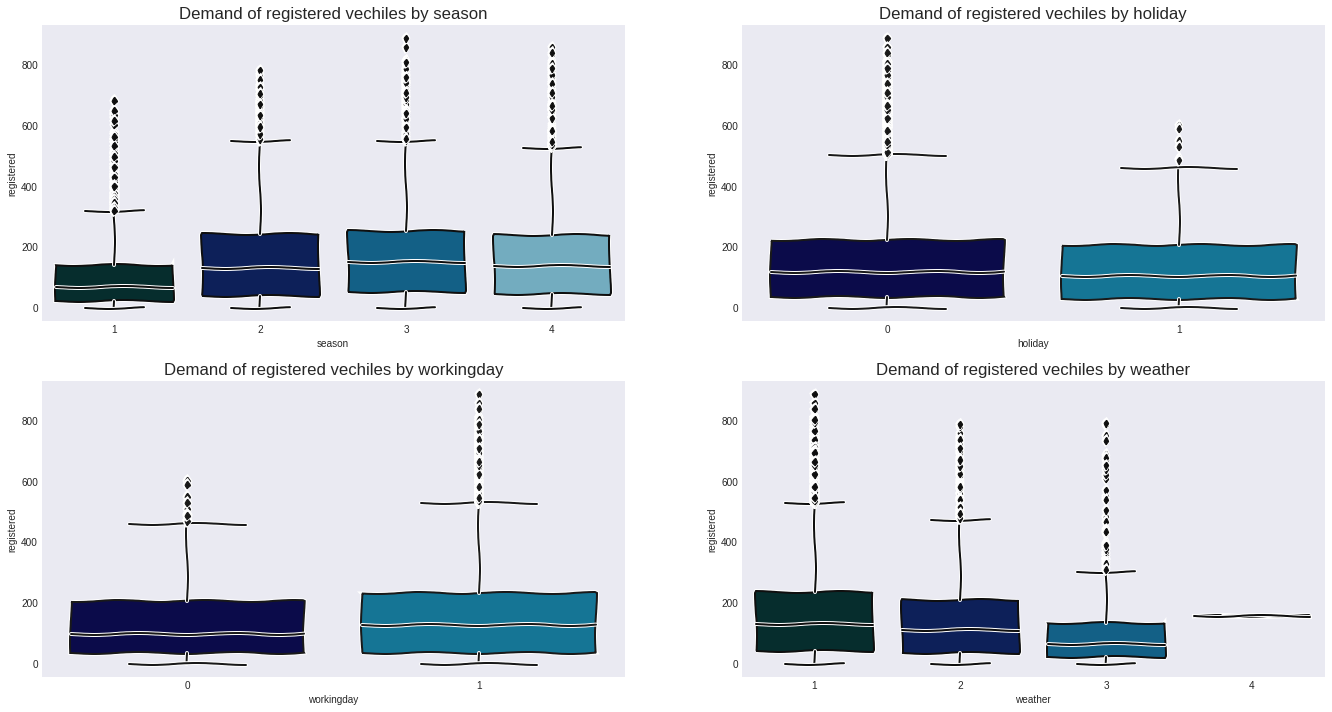

In [ ]:
categorical_columns = ['season', 'holiday', 'workingday', 'weather']

fig, ax = plt.subplots(2, 2, figsize=(23, 12))
axes = ax.ravel()

with plt.xkcd():
  for index, column in enumerate(categorical_columns):
    sns.boxplot(data=yulu, x=column, y="registered", palette="ocean", ax=axes[index])
    axes[index].set_title(f"Demand of registered vechiles by {column}", )

##<font color="red" face="georgia">Observations</font>

The observations for registered vehicles and counted vehicles are the same for all the categories, except there are outliers in the upper IQR for holidays.

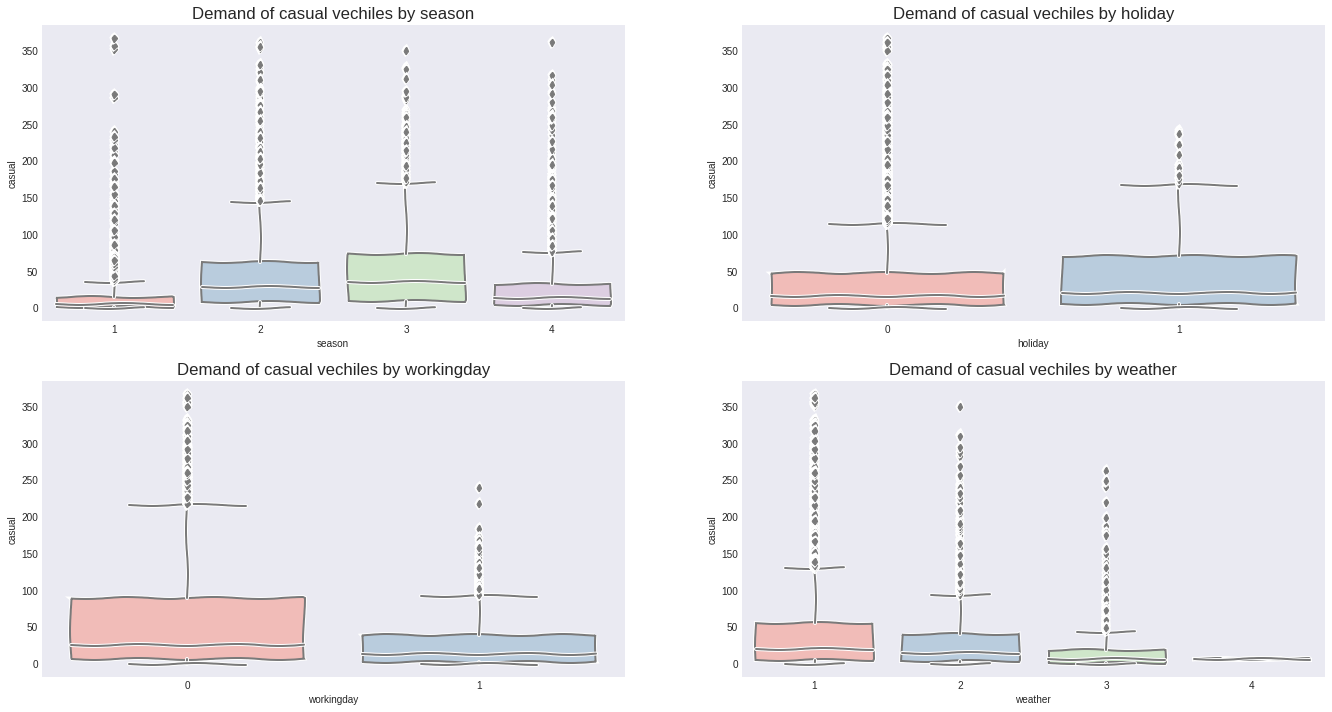

In [ ]:
categorical_columns = ['season', 'holiday', 'workingday', 'weather']

fig, ax = plt.subplots(2, 2, figsize=(23, 12))
axes = ax.ravel()

with plt.xkcd():
  for index, column in enumerate(categorical_columns):
    sns.boxplot(data=yulu, x=column, y="casual", palette="Pastel1", ax=axes[index])
    axes[index].set_title(f"Demand of casual vechiles by {column}", )

##<font color="red" face="georgia">Observations</font>

#```Season```
  1. The median casual demand in the summer, and fall seasons is nearly identical, while the median deman d is very low in the spring season and slightly more in winter season.

  2. The outliers in causal demand can be seen for all the seasons, probably lot of outliers in spring and winter season. All the outliers are in the upper range of Inter Quartile Range (IQR).

#```Holiday```

  1. The median casual demand for vechiles is nearly identical during holidays and non-holidays.

  2. There are outliers in the casual demand for holidays and non-holidays, and that too, in the upper Inter Quartile Range (IQR).

#```workinday```

  1. The median difference between a working day and a non-working day is only marginally significant.

  2. The distribution of the workinday is smaller than non-working day.

  2. There are outliers in vehicle demand on working and non-working days.

#```Weather```

1. For clear/few clouds and misty/cloudy conditions, the median demand for counted vehicles is nearly identical.

2. The demand for counted vehicles during light snow/light rain is less than during clear and mist conditions.

3. There is only one data point for heavy rain and thunder storms, which makes sense as nobody would prefer to ride in these heavy conditions.

4. There are outliers in the upper IQR for all the conditions, except heavy rain.


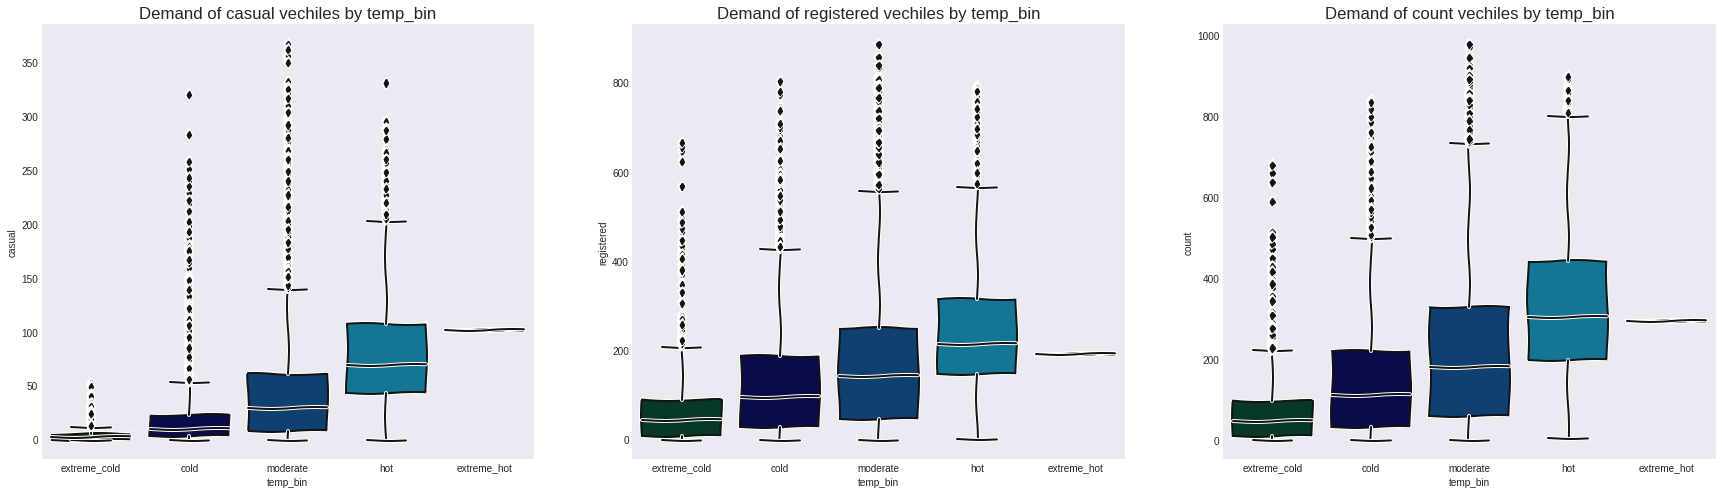

In [ ]:
continous_columns = ['casual', 'registered', 'count']

fig, ax = plt.subplots(1, 3, figsize=(30, 8))
axes = ax.ravel()

with plt.xkcd():
  for index, column in enumerate(continous_columns):
    sns.boxplot(data=yulu_copy, x='temp_bin', y=column, palette="ocean", ax=axes[index])
    axes[index].set_title(f"Demand of {column} vechiles by temp_bin", )

##<font color="red" face="georgia">Observations</font>

##```Casual Demand```

1. The demand for casual vehicles is highest in hot weather (30–40 degrees Celsius), followed by moderate temperatures (20–30 degrees Celsius).

2. Very few people have casually requested it during extreme cold or extreme heat.

3. From the graph, it looks like a moderate temperature has lots of outliers, and that too in the upper IQR.

##```Registered Demand```

1. The graph is almost identical to the casual vehicle demand graph, with the exception that there are more data points in extreme cold.

2. The median demand in extreme hot and hot is nearly identical.

##```Counted Demand```

As the counted demand is the sum of casual and registered demand, the graph is also the result of the same.



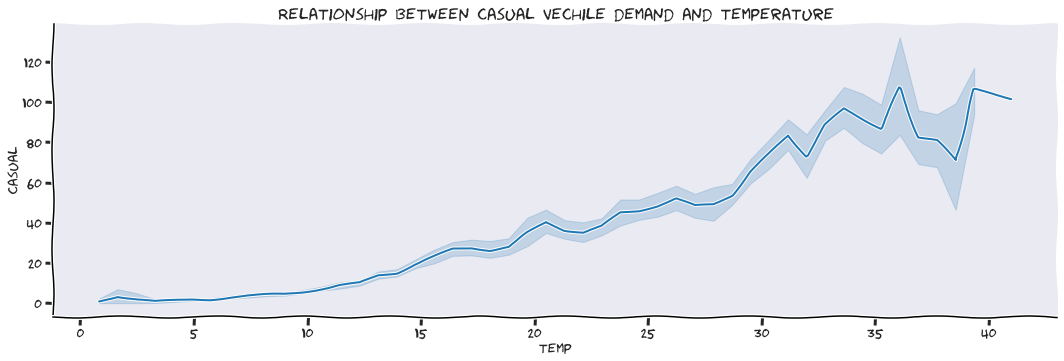

In [ ]:
continous_columns = ['casual', 'registered', 'count']

with plt.xkcd():
  sns.relplot(data=yulu, x="temp", y="casual", palette="tab10", kind='line', aspect=3)
  plt.title("Relationship between casual vechile demand and temperature")

##<font color="red" face="georgia">Observations</font>

Casual vehicle demand is linear beginning at 5 degrees Celsius and peaks at 35 and 40 degrees Celsius.

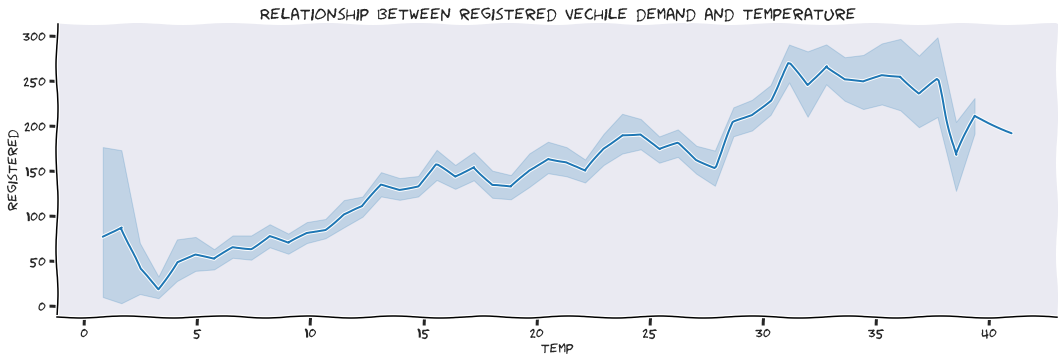

In [ ]:
with plt.xkcd():
  sns.relplot(data=yulu, x="temp", y="registered", palette="tab10", kind='line', aspect=3)
  plt.title("Relationship between registered vechile demand and temperature")

##<font color="red" face="georgia">Observations</font>


The registered demand for vehicles is linear, starting from 5 degrees Celsius to roughly 38 degrees Celsius, with a peak at 32 degrees.

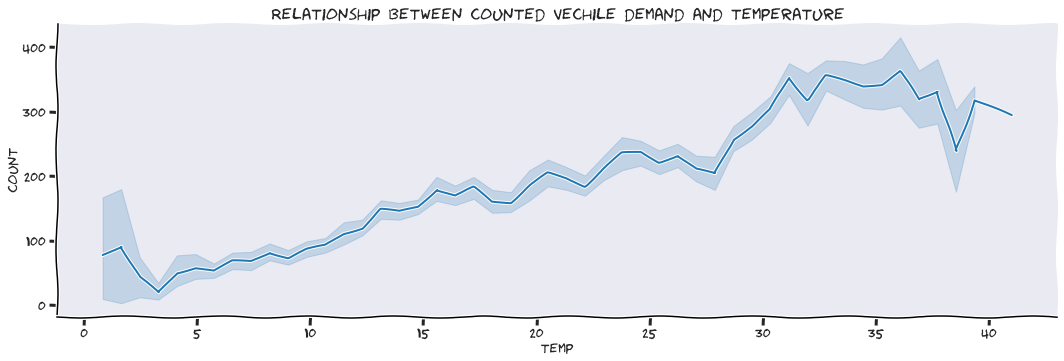

In [ ]:
with plt.xkcd():
  sns.relplot(data=yulu, x="temp", y="count", palette="tab10", kind='line', aspect=3)
  plt.title("Relationship between counted vechile demand and temperature")

##<font color="red" face="georgia">Observations</font>

The graph is nearly identical as the registered graph

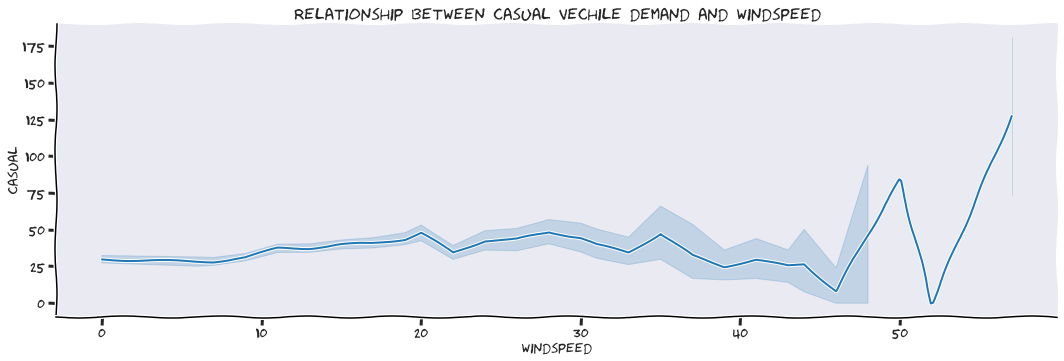

In [ ]:
with plt.xkcd():
  sns.relplot(data=yulu, x="windspeed", y="casual", palette="tab10", kind='line', aspect=3)
  plt.title("Relationship between casual vechile demand and windspeed")

##<font color="red" face="georgia">Observations</font>

Casual vehicle demand is flat for 15–30 users, with speeds ranging from 0–50.

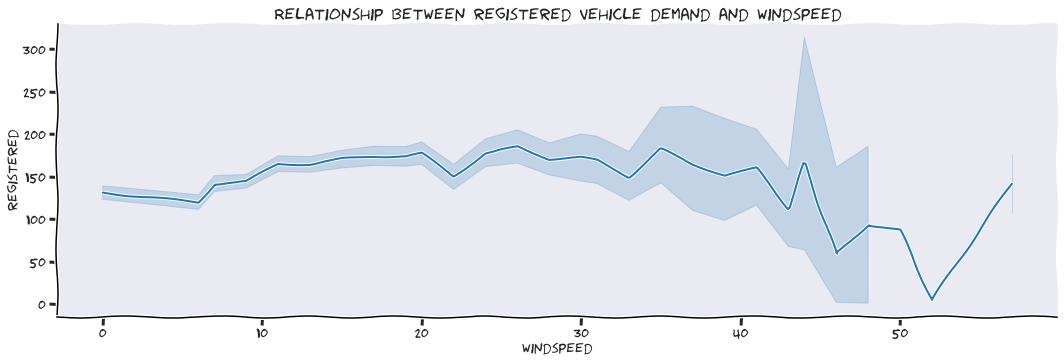

In [ ]:
with plt.xkcd():
  sns.relplot(data=yulu, x="windspeed", y="registered", palette="tab10", kind='line', aspect=3)
  plt.title("Relationship between registered vehicle demand and windspeed")

##<font color="red" face="georgia">Observations</font>

The registered vehicle demand is flat for 100-150 users at windspeeds ranging from 0–40. It starts declining from 40 onwards.

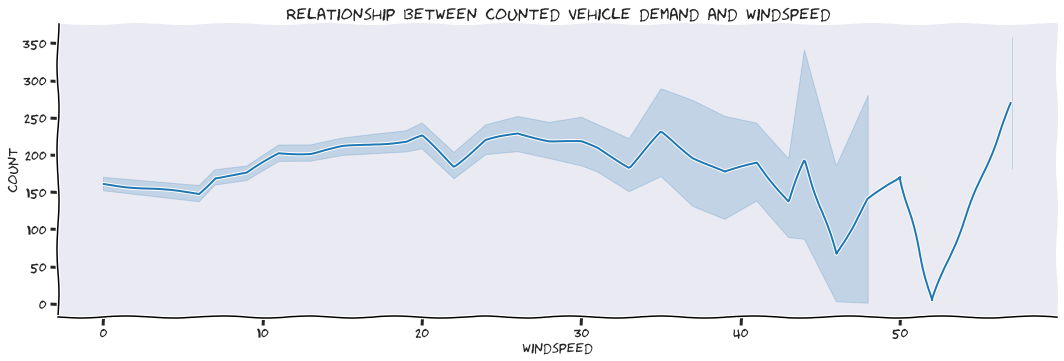

In [ ]:
with plt.xkcd():
  sns.relplot(data=yulu, x="windspeed", y="count", palette="tab10", kind='line', aspect=3)
  plt.title("Relationship between counted vehicle demand and windspeed")

##<font color="red" face="georgia">Observations</font>

Same observation as registred vechiles.

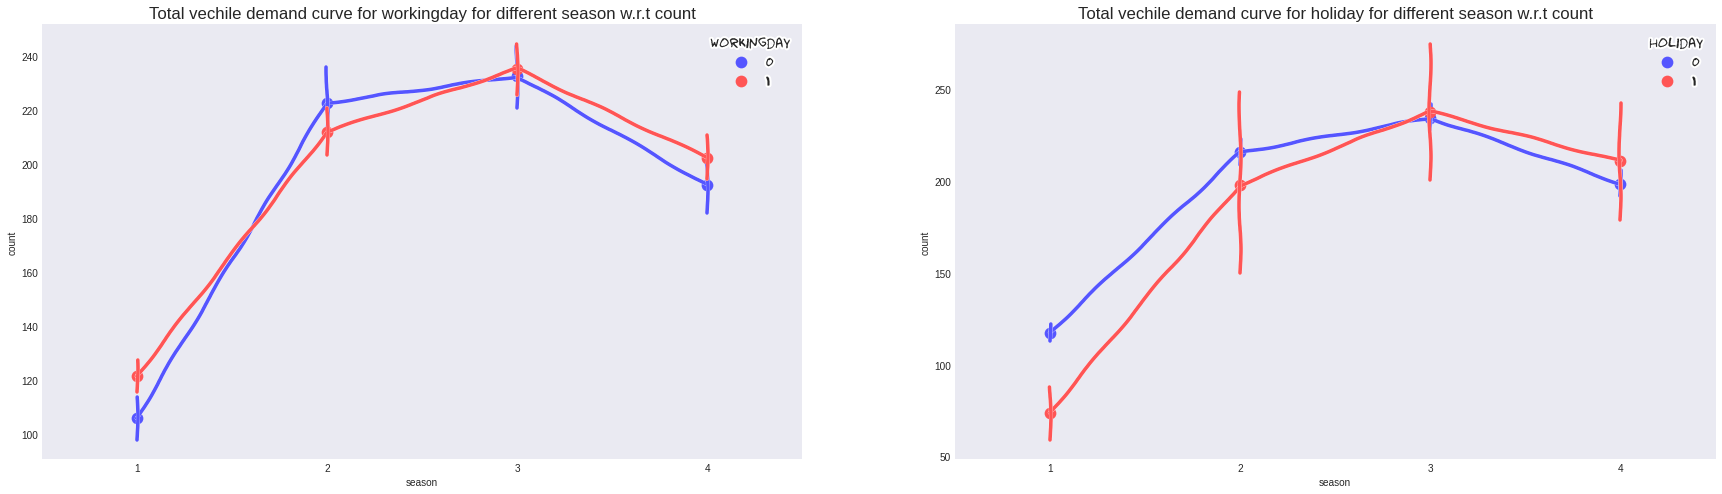

In [ ]:
days = ['workingday', 'holiday']

fig, ax = plt.subplots(1, 2, figsize=(30, 8))
axes = ax.ravel()

with plt.xkcd():
  for index, day in enumerate(days):
    # sns.pointplot(x="season", y="count", hue="workingday", data=yulu, palette="seismic")
    sns.pointplot(x="season", y="count", hue=day, data=yulu, palette="seismic", ax=axes[index])
    axes[index].set_title(f"Total vechile demand curve for {day} for different season w.r.t count")

##<font color="red" face="georgia">Observations</font>

##```Working Days```

1. The total demand for vehicles drastically increases from spring to summer and is constant from summer to fall.

2. The total demand is drastically reduced from fall to winter.

##```Holidays```

1. The total demand for vehicles for holidays and non-holidays rises in the spring and falls in the fall.

2. The total demand is slightly reduced from fall to winter.


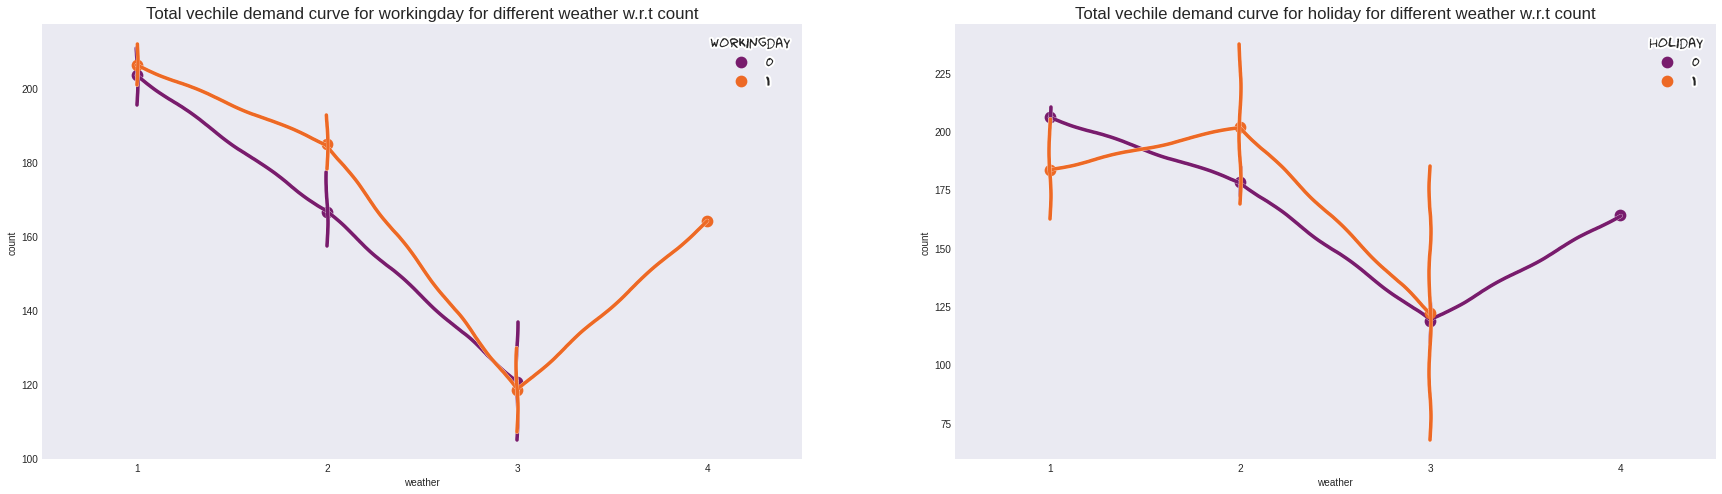

In [ ]:
days = ['workingday', 'holiday']

fig, ax = plt.subplots(1, 2, figsize=(30, 8))
axes = ax.ravel()

with plt.xkcd():
  for index, day in enumerate(days):
    sns.pointplot(x="weather", y="count", hue=day, data=yulu, palette="inferno", ax=axes[index])
    axes[index].set_title(f"Total vechile demand curve for {day} for different season w.r.t count")

##<font color="red" face="georgia">Observations</font>

##```Working Day```

The total demand for vehicles is drastically reduced from clear skies to cloudy mist and is further reduced to light snow or light rain for both working and non-working days.


##```Holiday```

The total demand curve is increasing from clear skies to cloudy mist and is reduced in light snow or light rain.


The graph shows an interesting contrast between clear skies and cloudy mist during holidays and non-holidays.





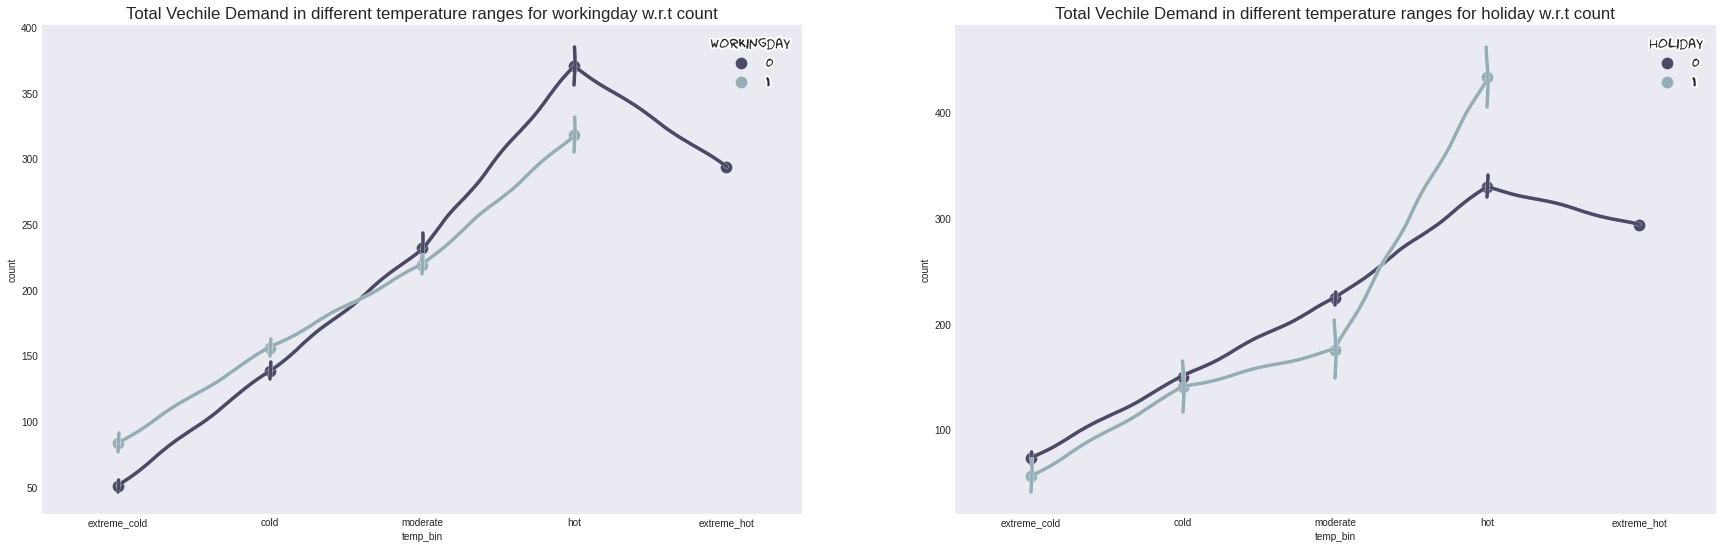

In [ ]:
days = ['workingday', 'holiday']

fig, ax = plt.subplots(1, 2, figsize=(30, 9))
axes = ax.ravel()

with plt.xkcd():
  for index, day in enumerate(days):
    sns.pointplot(x="temp_bin", y="count", hue=day, data=yulu_copy, palette="bone", ax=axes[index])
    axes[index].set_title(f"Total Vechile Demand in different temperature ranges for {day} w.r.t count")

##<font color="red" face="georgia">Observations</font>

##```Working Days```

The total demand curve is linear for working and non-working days from extreme cold to hot. The curves for working and non-working are intersecting at a temperature between cold and moderate.

##```Holidays```

The total demand curve is linear and parellel for holidays and non-holidays during extreme cold to moderate temperatures. The curve has huge difference during hot temperatures.


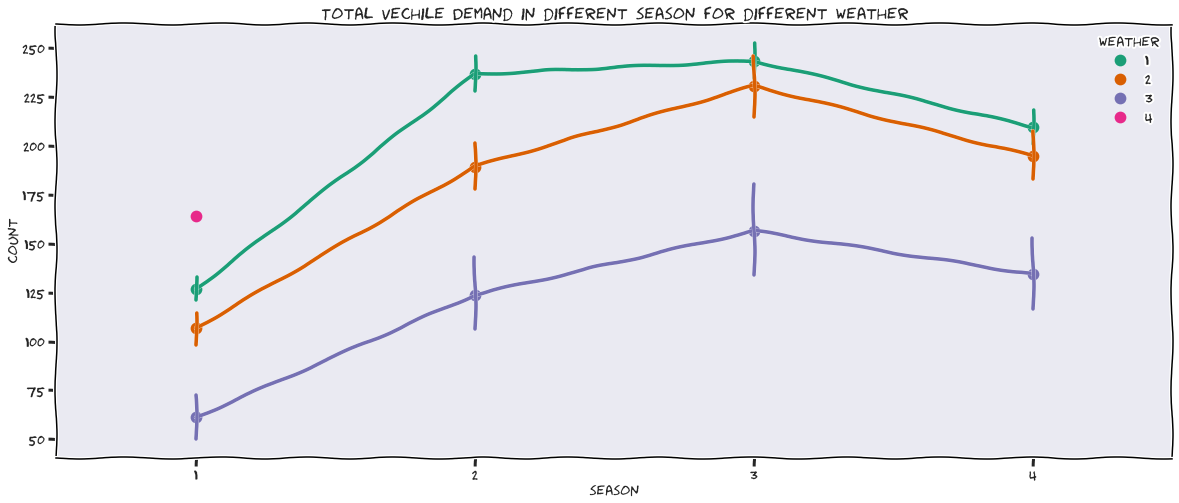

In [ ]:
with plt.xkcd():
  plt.figure(figsize=(20, 8))
  sns.pointplot(x="season", y="count", hue="weather", data=yulu_copy, palette="Dark2")
  plt.title("Total Vechile Demand in different season for different weather")

##<font color="red" face="georgia">Observations</font>

The total demand curve is linearly the same and parallel to each other during different weather conditions.

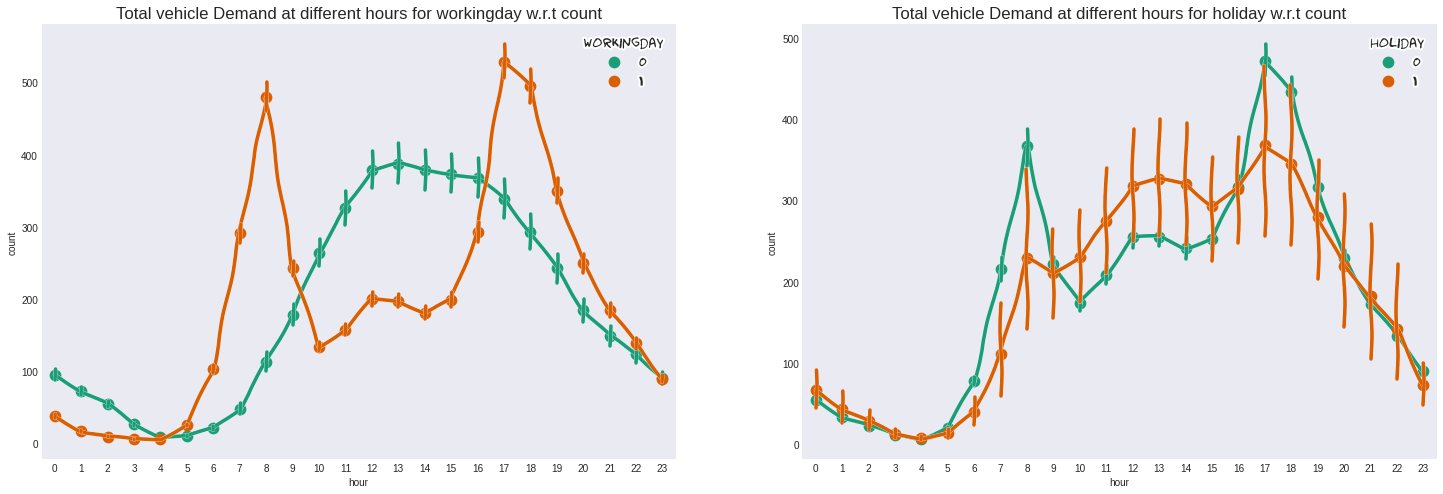

In [ ]:
days = ['workingday', 'holiday']

fig, ax = plt.subplots(1, 2, figsize=(25, 8))
axes = ax.ravel()

with plt.xkcd():
  for index, day in enumerate(days):
    sns.pointplot(x="hour", y="count", hue=day, data=yulu_copy, palette="Dark2", ax=axes[index])
    axes[index].set_title(f"Total vehicle Demand at different hours for {day} w.r.t count")

##<font color="red" face="georgia">Observations</font>

##```Working Day```

1. The total vehicle demand curve is intersected at 5, 10, 17, and 24 hours for working and non-working day.
2. The working day curve with respect to count has two peaks, i.e., at 7.50 and the 17th hour.
3. From 10 to 16 hours, the curve difference between working and not working is enormous.

##```Holiday```

1. The total vehicle demand curve is nearly identical from 1–5 hours for holidays and non-holidays, and is linearly increasing from 6–8 hours, with confidence intervals (C.I) that can be seen on holidays.

2. From 8 hours onwards, the curve is facing a downward slope for non-holidays but facing an upwards slope for holidays.

3. From 17 hours onwards, both holiday and non-holiday are facing a downwards slope.




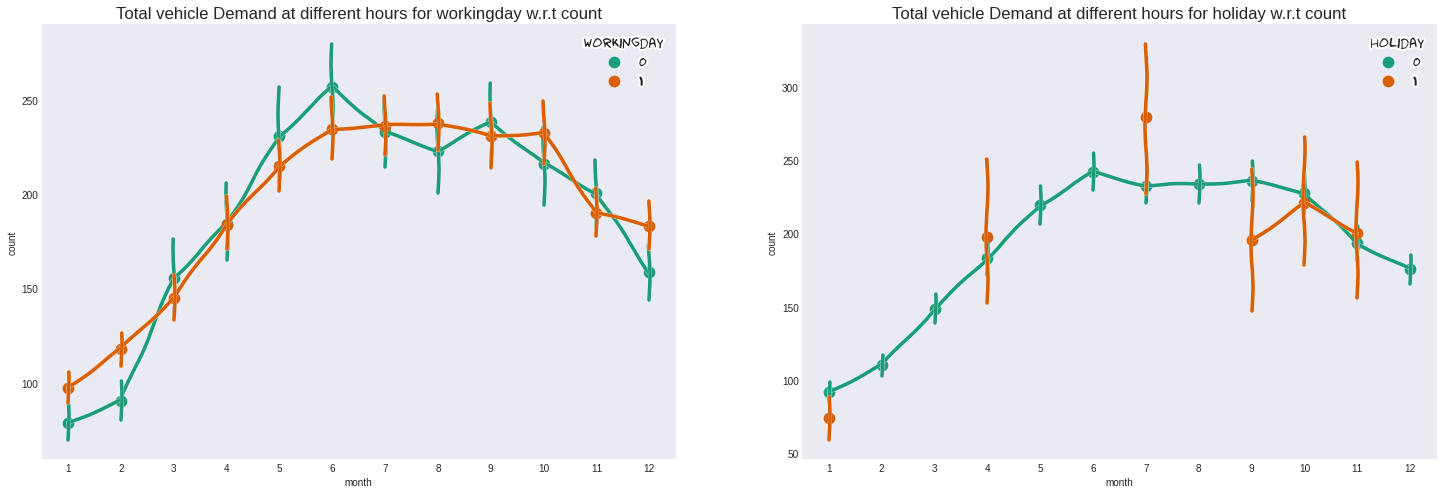

In [ ]:
days = ['workingday', 'holiday']

fig, ax = plt.subplots(1, 2, figsize=(25, 8))
axes = ax.ravel()

with plt.xkcd():
  for index, day in enumerate(days):
    sns.pointplot(x="month", y="count", hue=day, data=yulu_copy, palette="Dark2", ax=axes[index])
    axes[index].set_title(f"Total vehicle Demand at different hours for {day} w.r.t count")

#```Statistical Tests```

##```2 Sample T-Test```

2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented.

Null Hypothesis: $H_{0}$: $μ_{workingday}$ = $μ_{non-workingday}$

Alternative Hypothesis: $H_{a}$: $μ_{workingday}$ != $μ_{non-workingday}$

Assumptions of T-Test

1. The sample size should be less than 30.
2. The population variance is unknown.
3. The population mean and standard deviation are finite.
4. The means of the two populations being compared should follow normal distributions.
5. If using Student's original definition of the t-test, the two populations being compared should have the same variance. If the sample sizes in the two groups being compared are equal, Student's original t-test is highly robust to the presence of unequal variances. - [Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-test#Assumptions)

In [ ]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
from scipy.stats import ttest_ind

In [ ]:
working_day_count = yulu[(yulu['workingday'] == 1)]['count']
non_working_day_count = yulu[(yulu['workingday'] == 0)]['count']

t_stat, p_value = np.round(ttest_ind(working_day_count, non_working_day_count, random_state=42), 2)
print(f"T-test statistic is {t_stat} and p_value is {p_value}")

T-test statistic is 1.21 and p_value is 0.23


##<font color="red" face="georgia">Conclusion</font>

This results in a p-value of 0.23, which is below the defined significance level of 5%. The T-test is therefore not significant and the NULL HYPOTHESIS is CONFIRMED.


#```Analysis of Variance (ANOVA)```

To check if No. of cycles rented is similar or different in different
1. Weather
2. Season

##```Assumptions```

1. The samples are independent.

2. Each sample is from a normally distributed population.

3. The population standard deviations of the groups are all equal. This property is known as homoscedasticity.



#```Season```

Null Hypothesis: $H_{0}$: $μ_{spring}$ = $μ_{summer}$ = $μ_{fall}$ = $μ_{winter}$

Alternative Hypothesis: $H_{a}$: $μ_{spring}$ != $μ_{summer}$ != $μ_{fall}$ != $μ_{winter}$

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
from scipy.stats import f_oneway

In [ ]:
# ANOVA for season
spring_season = yulu[yulu['season'] == 1]['count']
summer_season = yulu[yulu['season'] == 2]['count']
fall_season = yulu[yulu['season'] == 3]['count']
winter_season = yulu[yulu['season'] == 4]['count']

# https://en.wikipedia.org/wiki/F-test
f_stat, p_value = f_oneway(spring_season, summer_season, fall_season, winter_season)
print(f"F-test statistic is {f_stat} and p_value is {p_value}")

F-test statistic is 236.94671081032106 and p_value is 6.164843386499654e-149


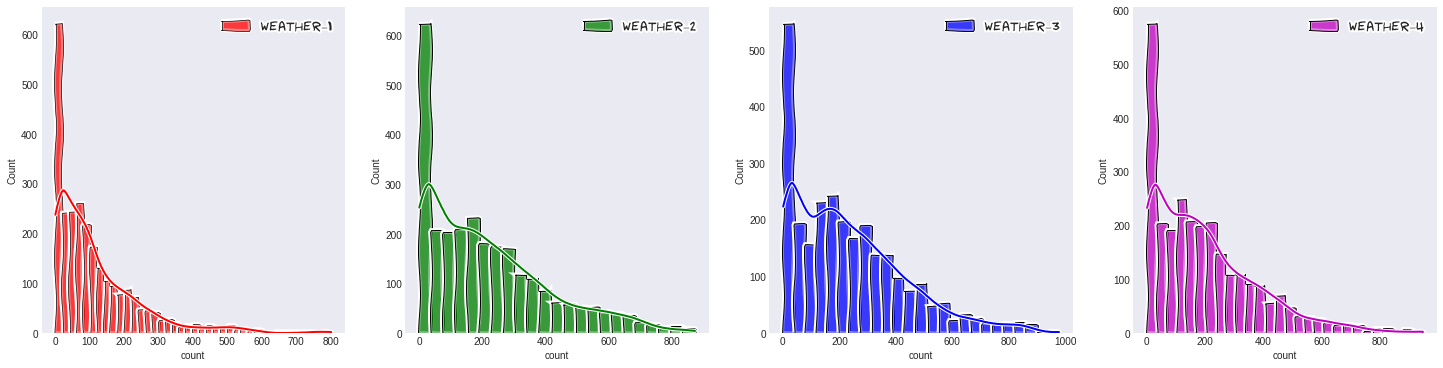

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(25, 6))
axes = ax.ravel()

seasons = [1, 2, 3, 4]
colors = ['r','g','b','m']
with plt.xkcd():
  for index, season in enumerate(seasons):
    sns.histplot(yulu[yulu['season'] == season]['count'], ax=axes[index], kde=True, color=colors[index], label=f'weather_{season}', )
    axes[index].legend()


##<font color="red" face="georgia">Observations</font>

As we can see, the count distribution for all the seasons is not normally distributed. As a result, in order to run an ANOVA test, we must first transform into a normal distribution using the Box-Cox transformation.

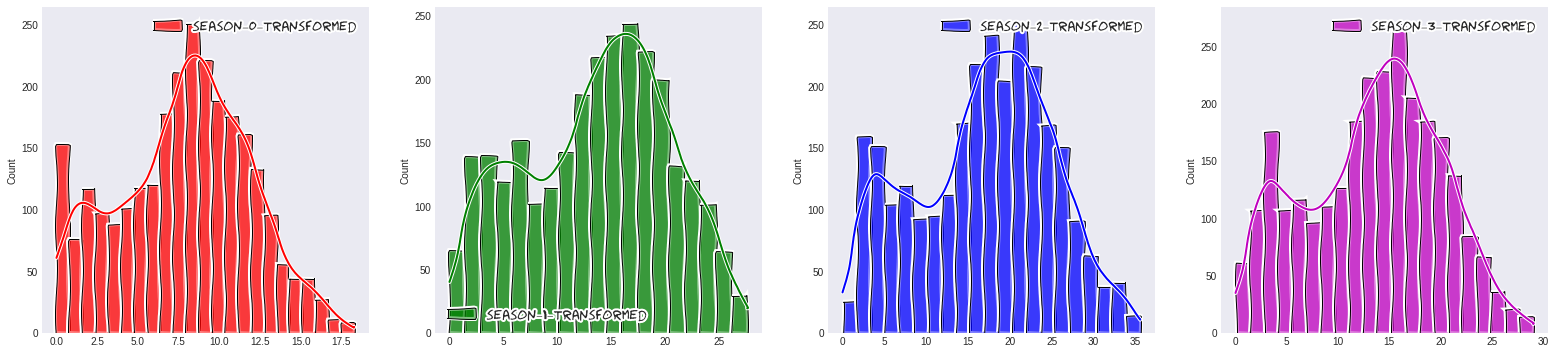

In [ ]:
# Box-Cox Transformation
from scipy.stats import boxcox

season_1_transformed = boxcox(yulu[yulu['season'] == 1]['count'])
season_2_transformed = boxcox(yulu[yulu['season'] == 2]['count'])
season_3_transformed = boxcox(yulu[yulu['season'] == 3]['count'])
season_4_transformed = boxcox(yulu[yulu['season'] == 4]['count'])

fig, ax = plt.subplots(1, 4, figsize=(27, 6))
axes = ax.ravel()

transformed_seasons = [season_1_transformed, season_2_transformed, season_3_transformed, season_4_transformed]
colors = ['r','g','b', 'm']
with plt.xkcd():
  for index, season in enumerate(transformed_seasons):
    sns.histplot(season[0], ax=axes[index], kde=True, color=colors[index], label=f'season_{index}_transformed', )
    axes[index].legend()



In [ ]:
# https://en.wikipedia.org/wiki/F-test
f_stat, p_value = f_oneway(season_1_transformed[0], season_2_transformed[0], season_3_transformed[0], season_4_transformed[0])
print(f"F-test statistic is {f_stat} and p_value is {p_value}")

F-test statistic is 890.4936156746095 and p_value is 0.0


##<font color="red" face="georgia">Conclusion</font>

This results in a p-value of 0.0, which is below the defined significance level of 5%. The ANOVA test for season is therefore significant and the NULL HYPOTHESIS is NOT CONFIRMED.


#```Weather```

Null Hypothesis: $H_{0}$: $μ_{1}$ = $μ_{2}$ = $μ_{3}$

Alternative Hypothesis: $H_{a}$: $μ_{1}$ != $μ_{2}$ != $μ_{3}$

In [ ]:
# ANOVA for weather
weather_1 = yulu[yulu['weather'] == 1]['count']
weather_2 = yulu[yulu['weather'] == 2]['count']
weather_3 = yulu[yulu['weather'] == 3]['count']
weather_4 = yulu[yulu['weather'] == 4]['count']

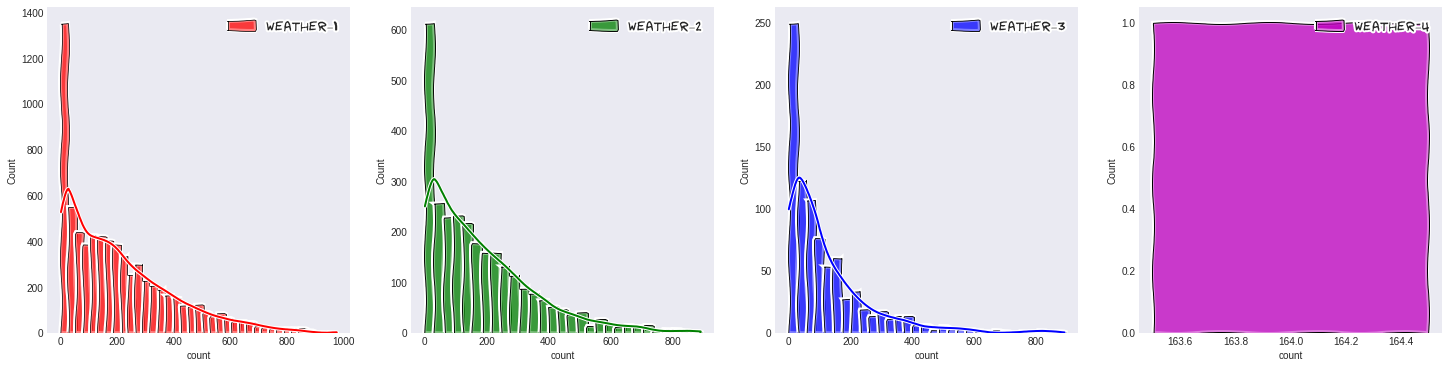

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(25, 6))
axes = ax.ravel()

weathers = [1, 2, 3, 4]
colors = ['r','g','b','m']
with plt.xkcd():
  for index, weather in enumerate(weathers):
    sns.histplot(yulu[yulu['weather'] == weather]['count'], ax=axes[index], kde=True, color=colors[index], label=f'weather_{weather}', )
    axes[index].legend()


##<font color="red" face="georgia">Observations</font>

As we can see, the count distribution for all the weather is not normally distributed. As a result, in order to run an ANOVA test, we must first transform into a normal distribution using the Box-Cox transformation.

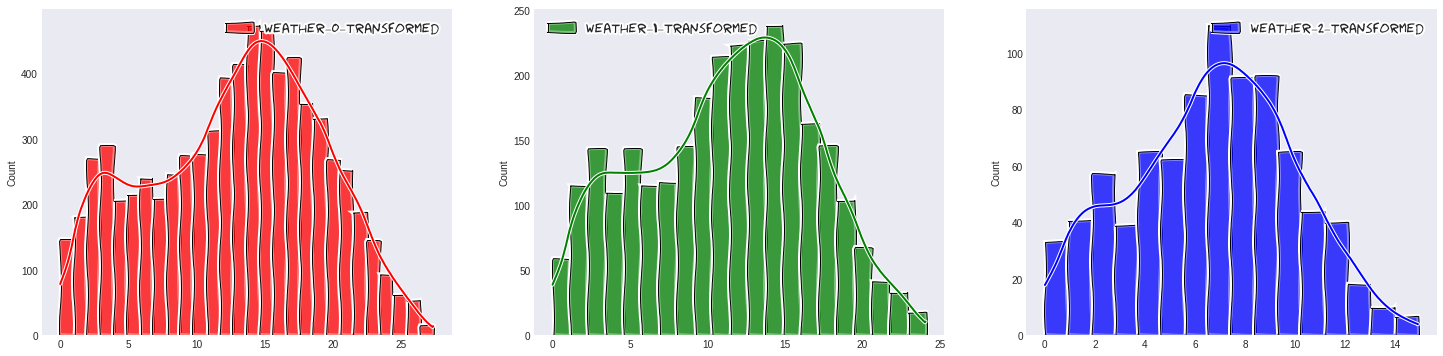

In [ ]:
# Box-Cox Transformation
from scipy.stats import boxcox

weather_1_transformed = boxcox(yulu[yulu['weather'] == 1]['count'])
weather_2_transformed = boxcox(yulu[yulu['weather'] == 2]['count'])
weather_3_transformed = boxcox(yulu[yulu['weather'] == 3]['count'])

# Here we are ignoring weather==4, because there is only one data point.
# weather_4_transformed = boxcox(yulu[yulu['weather'] == 4]['count'])

fig, ax = plt.subplots(1, 3, figsize=(25, 6))
axes = ax.ravel()

transformed_weathers = [weather_1_transformed, weather_2_transformed, weather_3_transformed]
colors = ['r','g','b']
with plt.xkcd():
  for index, weather in enumerate(transformed_weathers):
    sns.histplot(weather[0], ax=axes[index], kde=True, color=colors[index], label=f'weather_{index}_transformed', )
    axes[index].legend()

In [ ]:
# https://en.wikipedia.org/wiki/F-test
f_stat, p_value = f_oneway(weather_1_transformed[0], weather_2_transformed[0], weather_3_transformed[0])
print(f"F-test statistic is {f_stat} and p_value is {p_value}")

F-test statistic is 431.79686015294686 and p_value is 3.4867243611236345e-181


##<font color="red" face="georgia">Conclusion</font>

This results in a p-value of 3.486e-181, which is below the defined significance level of 5%. The ANNOVA test for weather is therefore significant and the NULL HYPOTHESIS is NOT CONFIRMED.

#$\chi$ $^ {2}$ Test

Note: An often quoted guideline for the validity of this calculation is that the test should be used only if the observed and expected frequencies in each cell are at least 5.

##Assumptions [Reference](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3900058/)

1. The data in the cells should be frequencies, or counts of cases rather than percentages or some other transformation of the data.

2. The levels (or categories) of the variables are mutually exclusive.

3. The study groups must be independent. This means that a different test must be used if the two groups are related.

4. The value of the cell expecteds should be 5 or more in at least 80% of the cells, and no cell should have an expected of less than one.


Null Hypothesis: $H_{0}$: The impact of weather is independent of seasons.

Alternative Hypothesis: $H_{a}$: The impact of weather has a different impact depending on the season.

In [ ]:
from scipy.stats.contingency import chi2_contingency

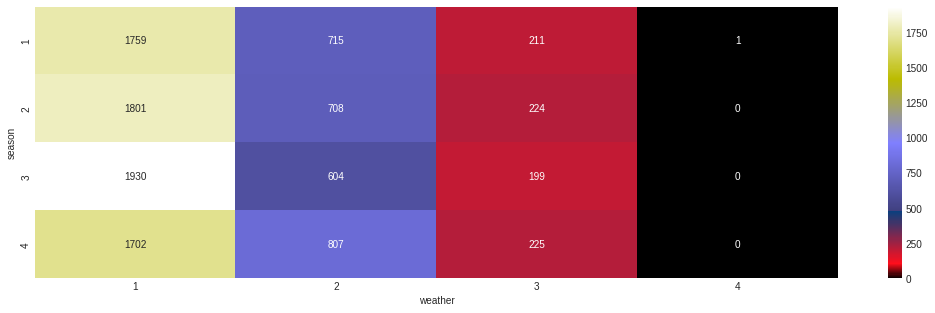

In [ ]:
plt.figure(figsize=(18, 5))
contingency_table = pd.crosstab(yulu['season'], yulu['weather'])
values = np.array([contingency_table.iloc[0][:4], contingency_table.iloc[1][:4], contingency_table.iloc[2][:4]])
sns.heatmap(contingency_table, annot=True, fmt='.6g', cmap="gist_stern")
plt.show()

In [ ]:
chi2_stat, p_value, dof, expected_values = chi2_contingency(values)
print(f"Chi2-test statistic is {chi2_stat} and p_value is {p_value}")

Chi2-test statistic is 23.02733254462982 and p_value is 0.0007873757080593115


This results in a p-value of 0.0007873757080593115, which is below the defined significance level of 5%. The Chi2 test is therefore significant and the NULL HYPOTHESIS is NOT CONFIRMED.

#```Insights```

1. By performing a 2-sample T-test on working and non-working days with respect to count, we can infer that the population count means of both categories are the same.

2. By performing an ANOVA test on different seasons with respect to count, we can infer that population count means under different seasons are not the same, meaning there is a difference in the usage of Yulu bikes in different seasons.

3. By performing an ANOVA test on different weather conditions except 4 with respect to count, we can infer that population count means under different weather conditions are the same, meaning there is a difference in the usage of Yulu bikes in different weather conditions.

4. By performing a Chi2 test on season and weather (categorical variables), we can infer that there is an impact on weather dependent on season.

5. The median temperature is noted at 20.5 degrees Celsius, while 75% of the data has been recorded at 26.24 degrees Celsius. The average temperature is noted as 20.36 degrees Celsius.

6. The Yulu has a median of 145 counted (casual + registered) users, with 75% of users totaling 284. The average number of counted users is 191.574. The maximum number of counted users is 977.

7. 68% of the data points are collected for the working day, which makes sense as a lot of people use public transportation on working days.

8. Very few data points are collected during light snow or light rain conditions; probably a lot of people don't use the service during heavy rain or thunder storms, which makes absolute sense.

9. The average temperature was 20.23 degrees Celsius, with 20.5 happening 50% of the time.

10. The maximum number of holidays can be seen during the fall and winter seasons.

11. In the year 2011, the average number of total users was 144, with a huge standard deviation of 133, a median of 111, and a maximum and minimum count of 638 and 1, respectively. In the year 2012, the average number of total users was 238.56, with a huge standard deviation of 208, a median of 199, and a maximum and minimum count of 977 and 1, respectively.

12. In October, the average number of total users was 228, with a standard deviation of 204, a median of 180, and a maximum and minimum count of 948 and 1, respectively.

13. There is a strong positive correlation between casual and count, and a very high correlation between registered and counted users.

14. The median difference between a working day and a non-working day is only marginally significant.

15. The total demand curve is increasing from clear skies to cloudy mist and is reduced in light snow or light rain.




#```Recommendations```

1. The counted vehicle demand on non-working and holiday days is very low. Yulu can introduce promotional offers on holidays and non-holidays or can arrange health competitions on Yulu Move bikes.

2. Because vehicle demand is low from January to June, Yulu can promote itself by offering a weekly or biweekly discount based on a certain amount of usage in that month.

3. Yulu can offer customised referral discounts based on the bikes they choose in their first trial (Yulu Miracle, Yulu Dex, Yulu Move).

4. The amount of bicycle usage during 0 to 8 hours is very low. Yulu can promote itself by allowing fitness enthusiasts to use Yulu Move during that period by rewarding them with exciting prizes.

5. During the spring season, the demand for vehicles is very low. Yulu can introduce discounted offers to promote more usage of bikes during spring.
